train freq 1      : 5 run(s)
train freq 8      : 5 run(s)
train freq 32     : 4 run(s)


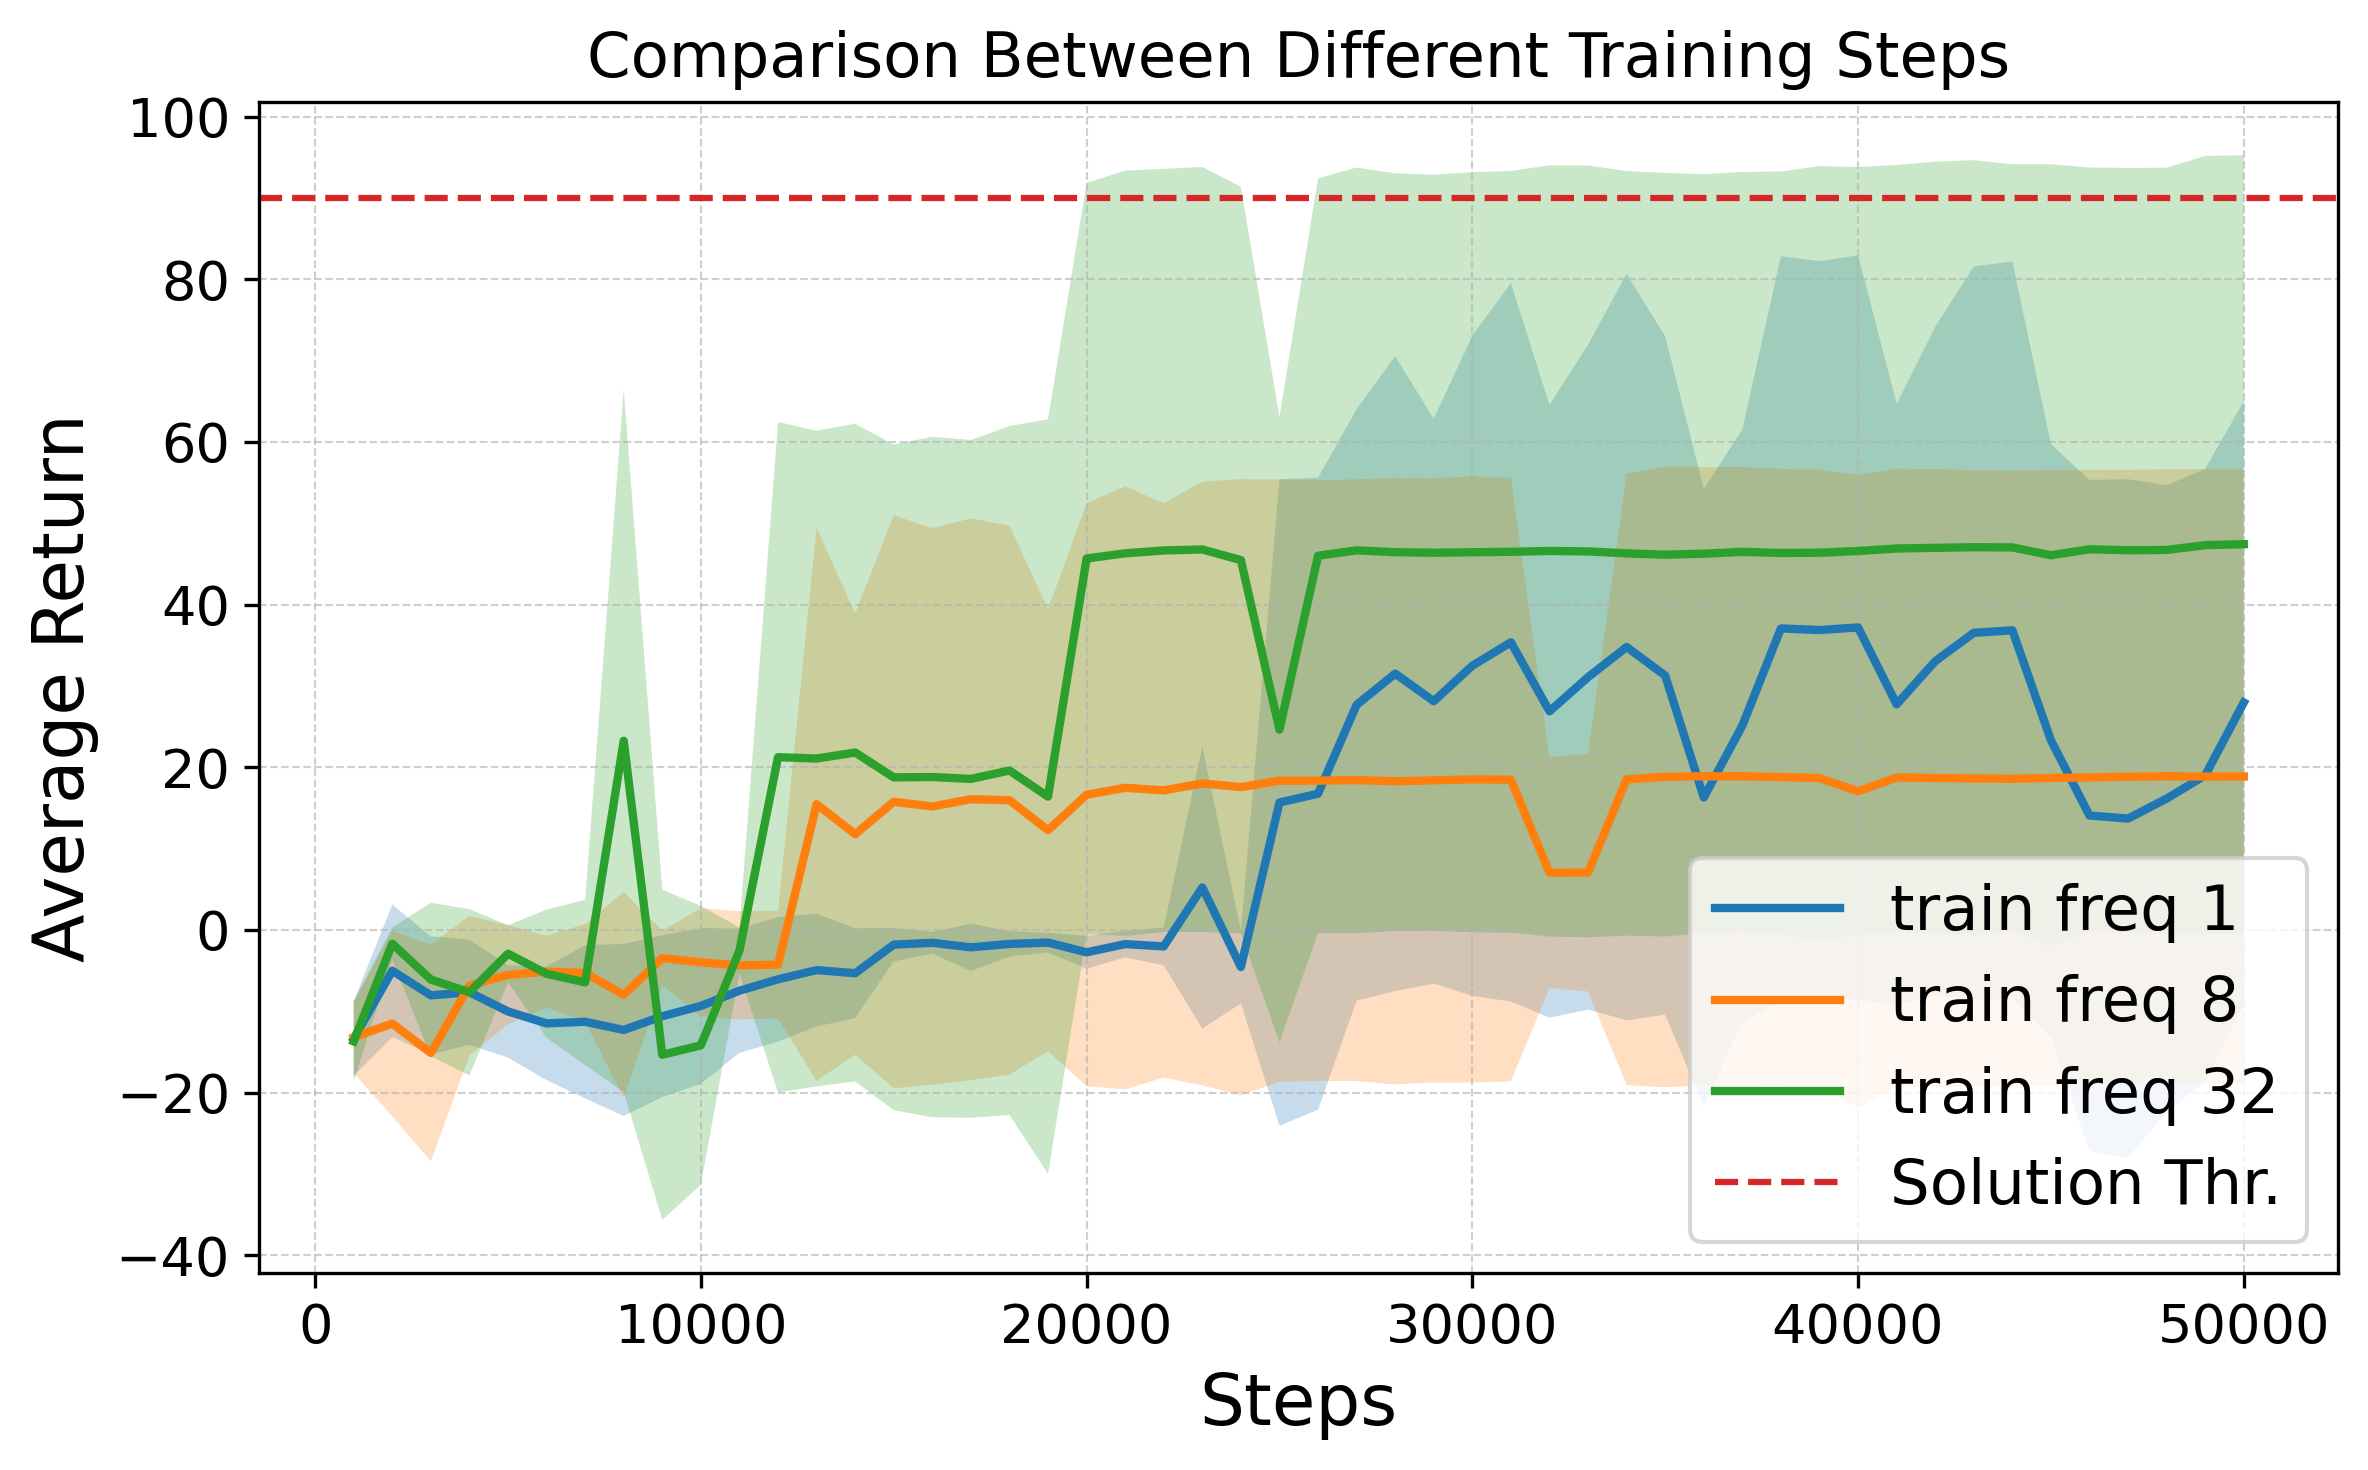

In [1]:
"""
Plot learning curves (mean ± 1 σ over 3 seeds)
==============================================

Expected file naming scheme (adapt to yours!)
    SAC_<env>_use_sde{0|1}_train_freq{1|32}_gradient_step{1|32}_seed<SEED>.npz

Each .npz must contain at least the array  ``eval_returns``  with shape (T, 2)
    eval_returns[:,0]  → global training step
    eval_returns[:,1]  → evaluation return at that step
"""

import glob, json, math, pathlib
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------ #
# 1)  Declare the patterns for every configuration you’d like to draw
# ------------------------------------------------------------------ #
patterns = {
    "train freq 1":   "SAC_MountainCarContinuous-v0_a-0.1_lr-0.0003_tf-1_gd-1_sde-1_s-*.npz",
    "train freq 8":   "SAC_MountainCarContinuous-v0_a-0.1_lr-0.0003_tf-8_gd-8_sde-1_s-*.npz",
    # "train freq 16":   "SAC_MountainCarContinuous-v0_a-0.1_lr-0.0003_tf-16_gd-16_sde-1_s-*.npz",
    "train freq 32":   "SAC_MountainCarContinuous-v0_a-0.1_lr-0.0003_tf-32_gd-32_sde-1_s-*.npz",
    # "train freq 64":   "SAC_MountainCarContinuous-v0_a-0.1_lr-0.0003_tf-64_gd-64_sde-1_s-*.npz",
}


# 
# ------------------------------------------------------------------ #
# 2)  Helper – read one run and turn it into {step: return} dict
# ------------------------------------------------------------------ #
def load_eval_dict(npz_path):
    d      = np.load(npz_path, allow_pickle=True)
    steps  = d["eval_returns"][:, 0].astype(int)
    rets   = d["eval_returns"][:, 1].astype(float)
    return dict(zip(steps, rets))

# ------------------------------------------------------------------ #
# 3)  Aggregate across seeds, interpolate onto a common step grid
# ------------------------------------------------------------------ #
plt.figure(figsize=(8, 5), dpi=300)

for label, pattern in patterns.items():
    files = sorted(glob.glob("./runs/"+pattern))
    if len(files) == 0:
        print(f"⚠️  no files matched “{pattern}” – skipped")
        continue
    print(f"{label:18s}: {len(files)} run(s)")

    # collect dicts and a joint step grid
    runs_dict = [load_eval_dict(f) for f in files]
    all_steps = np.array(sorted(set(chain.from_iterable(d.keys() for d in runs_dict))))

    # interpolate each run onto all_steps
    interp_runs = []
    for d in runs_dict:
        # numpy interpolation needs sorted x; we already have all_steps sorted
        run_steps, run_vals = zip(*sorted(d.items()))
        interp = np.interp(all_steps, run_steps, run_vals)
        interp_runs.append(interp)
    interp_runs = np.vstack(interp_runs)        # shape (n_seeds, n_steps)

    mean = interp_runs.mean(axis=0)
    std  = interp_runs.std(axis=0)

    # ------------------------------------------------------------------ #
    # 4)  Plot mean curve with ±1 σ shaded band
    # ------------------------------------------------------------------ #
    plt.plot(all_steps, mean, label=label, linewidth=2)
    plt.fill_between(all_steps, mean - std, mean + std, alpha=0.25)

# ------------------------------------------------------------------ #
# 5)  Cosmetics
# ------------------------------------------------------------------ #
plt.xlabel("Steps", fontsize=17)
plt.ylabel("Average Return", fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.axhline(y=90, color = "#d62728", linestyle='--', linewidth=1.5, label='Solution Thr.')
plt.title("Comparison Between Different Training Steps", fontsize=15)
plt.legend(loc="lower right", fontsize=15)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.savefig("figures/train_step_compare.png")
plt.show()


gSDE              : 4 run(s)
Vanilla           : 4 run(s)


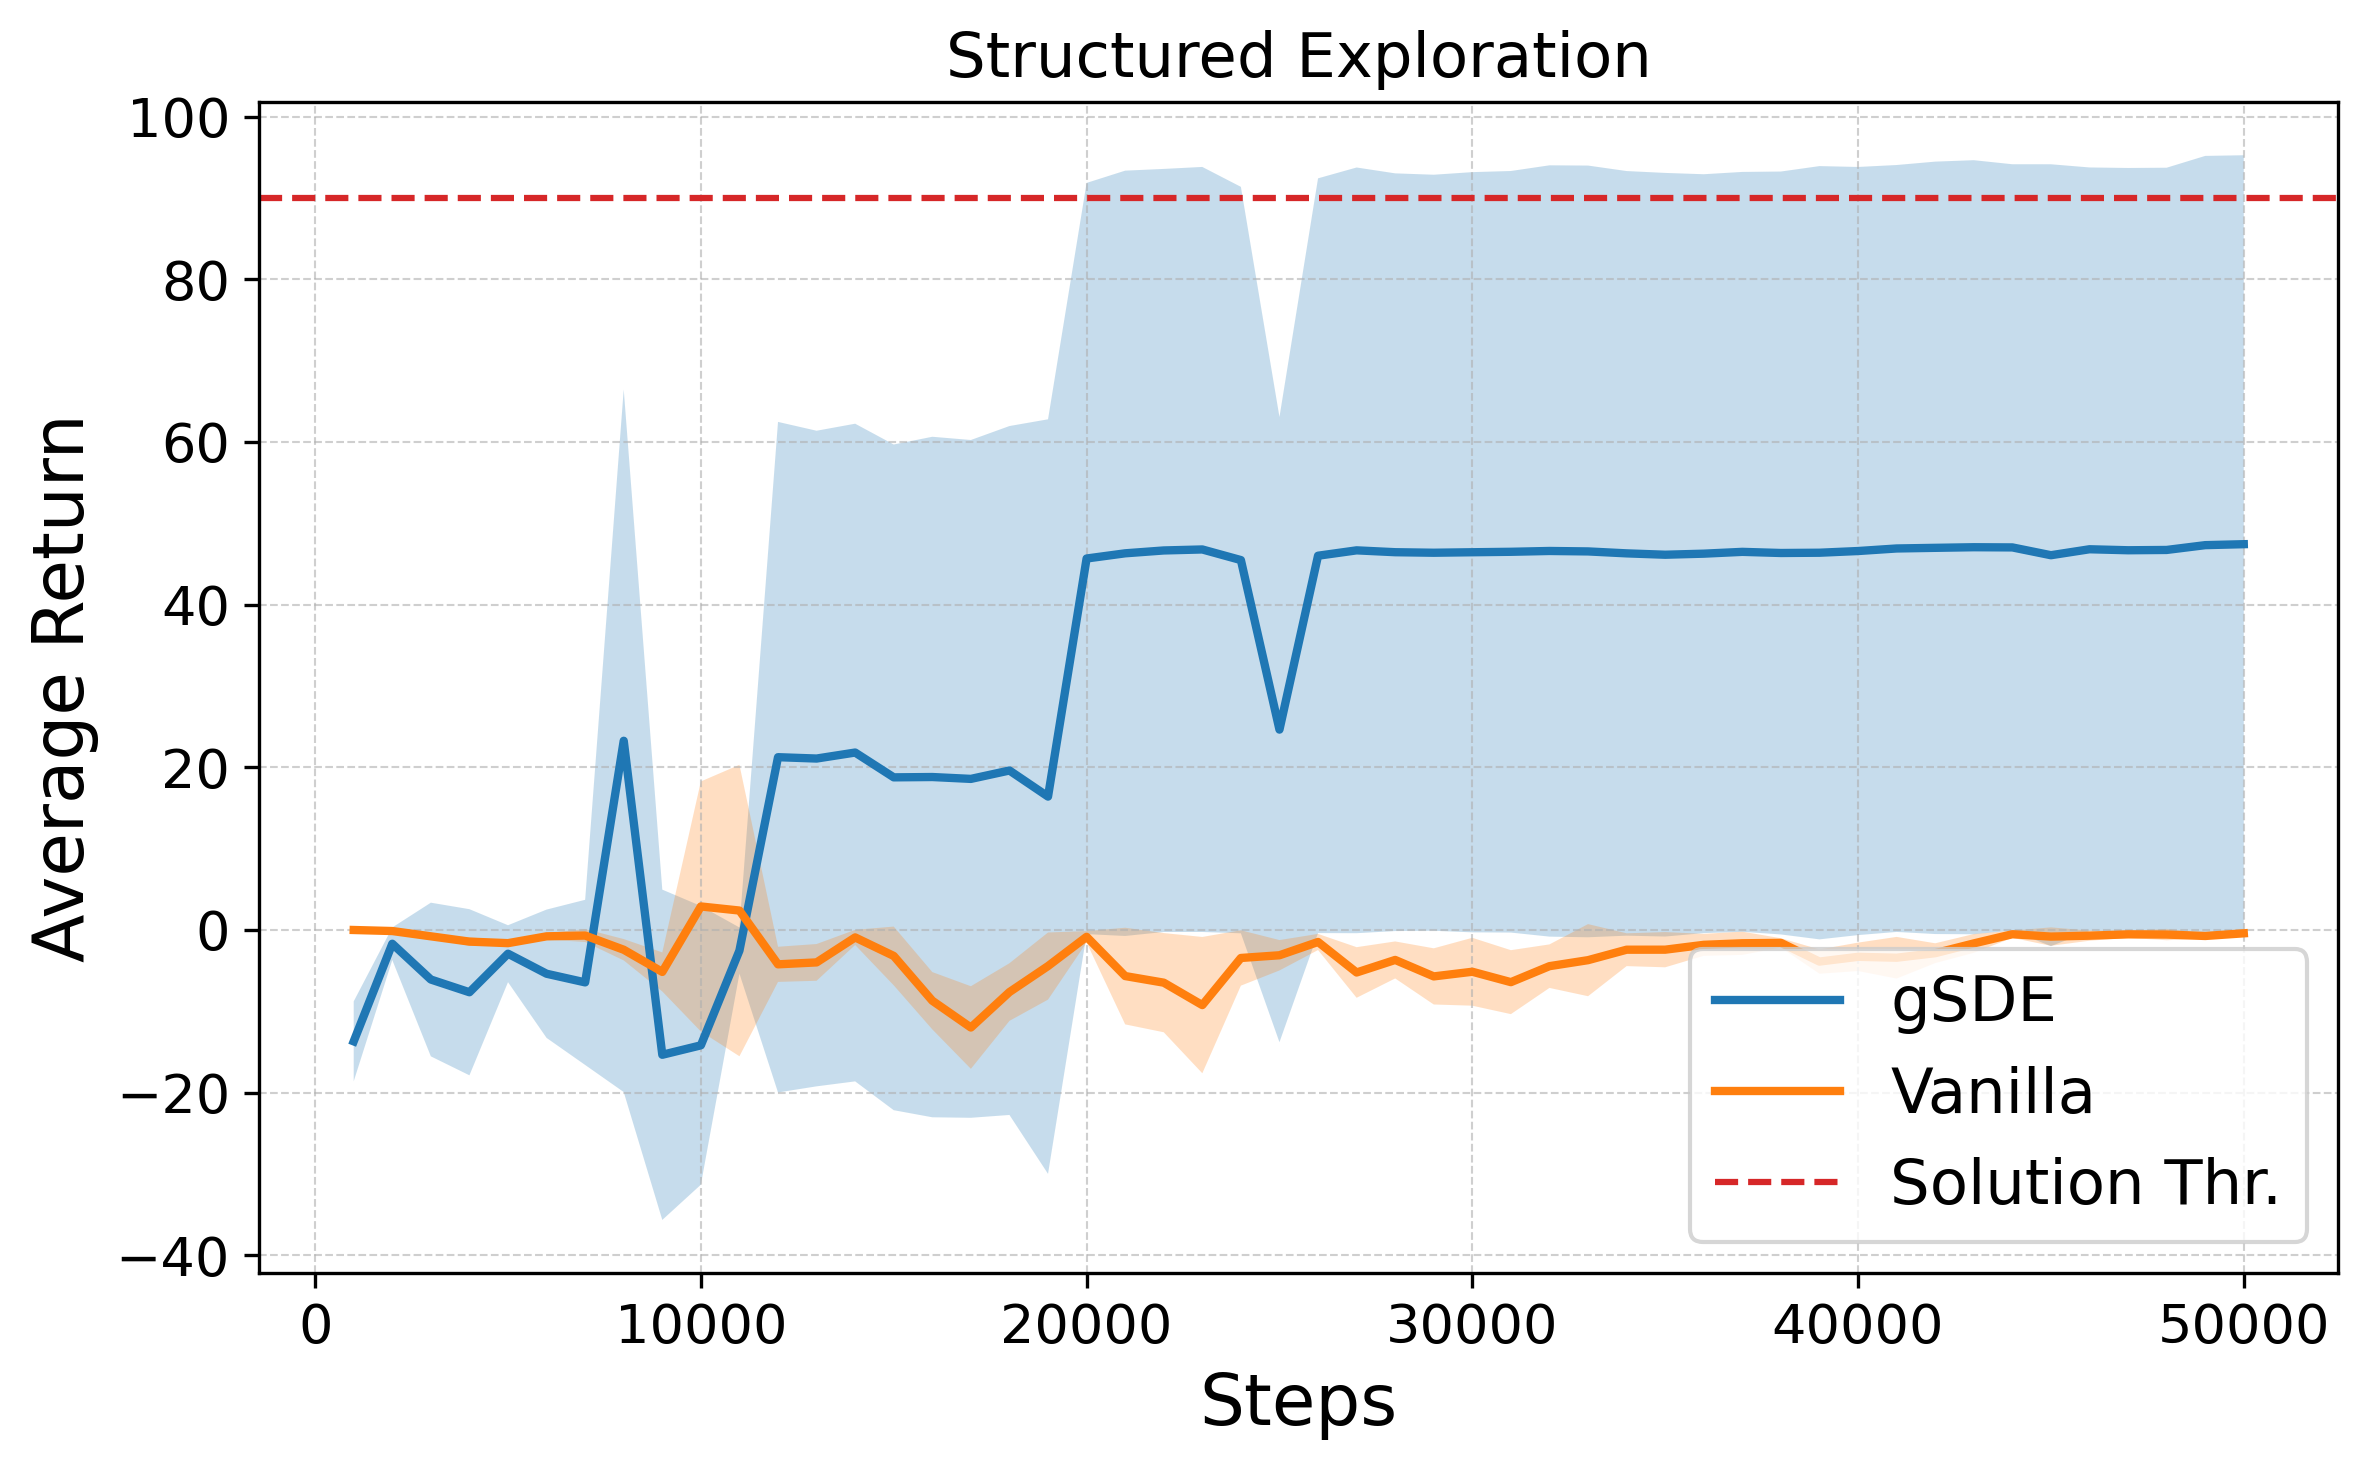

In [2]:
"""
Plot learning curves (mean ± 1 σ over 3 seeds)
==============================================

Expected file naming scheme (adapt to yours!)
    SAC_<env>_use_sde{0|1}_train_freq{1|32}_gradient_step{1|32}_seed<SEED>.npz

Each .npz must contain at least the array  ``eval_returns``  with shape (T, 2)
    eval_returns[:,0]  → global training step
    eval_returns[:,1]  → evaluation return at that step
"""

import glob, json, math, pathlib
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------ #
# 1)  Declare the patterns for every configuration you’d like to draw
# ------------------------------------------------------------------ #
patterns = {
    "gSDE":   "SAC_MountainCarContinuous-v0_a-0.1_lr-0.0003_tf-32_gd-32_sde-1_s-*.npz",
    "Vanilla":   "SAC_MountainCarContinuous-v0_a-0.1_lr-0.0003_tf-32_gd-32_sde-0_s-*.npz",
}



# ------------------------------------------------------------------ #
# 2)  Helper – read one run and turn it into {step: return} dict
# ------------------------------------------------------------------ #
def load_eval_dict(npz_path):
    d      = np.load(npz_path, allow_pickle=True)
    steps  = d["eval_returns"][:, 0].astype(int)
    rets   = d["eval_returns"][:, 1].astype(float)
    return dict(zip(steps, rets))

# ------------------------------------------------------------------ #
# 3)  Aggregate across seeds, interpolate onto a common step grid
# ------------------------------------------------------------------ #
plt.figure(figsize=(8, 5), dpi=300)

for label, pattern in patterns.items():
    files = sorted(glob.glob("./runs/"+pattern))
    if len(files) == 0:
        print(f"⚠️  no files matched “{pattern}” – skipped")
        continue
    print(f"{label:18s}: {len(files)} run(s)")

    # collect dicts and a joint step grid
    runs_dict = [load_eval_dict(f) for f in files]
    all_steps = np.array(sorted(set(chain.from_iterable(d.keys() for d in runs_dict))))

    # interpolate each run onto all_steps
    interp_runs = []
    for d in runs_dict:
        # numpy interpolation needs sorted x; we already have all_steps sorted
        run_steps, run_vals = zip(*sorted(d.items()))
        interp = np.interp(all_steps, run_steps, run_vals)
        interp_runs.append(interp)
    interp_runs = np.vstack(interp_runs)        # shape (n_seeds, n_steps)

    mean = interp_runs.mean(axis=0)
    std  = interp_runs.std(axis=0)

    # ------------------------------------------------------------------ #
    # 4)  Plot mean curve with ±1 σ shaded band
    # ------------------------------------------------------------------ #
    plt.plot(all_steps, mean, label=label, linewidth=2)
    plt.fill_between(all_steps, mean - std, mean + std, alpha=0.25)

# ------------------------------------------------------------------ #
# 5)  Cosmetics
# ------------------------------------------------------------------ #
plt.xlabel("Steps", fontsize=17)
plt.ylabel("Average Return", fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.axhline(y=90, color = "#d62728", linestyle='--', linewidth=1.5, label='Solution Thr.')
plt.title("Structured Exploration", fontsize=15)
plt.legend(loc="lower right", fontsize=15)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.savefig("figures/sde_compare.png")
plt.show()


gSDE              : 4 run(s)
Vanilla           : 4 run(s)


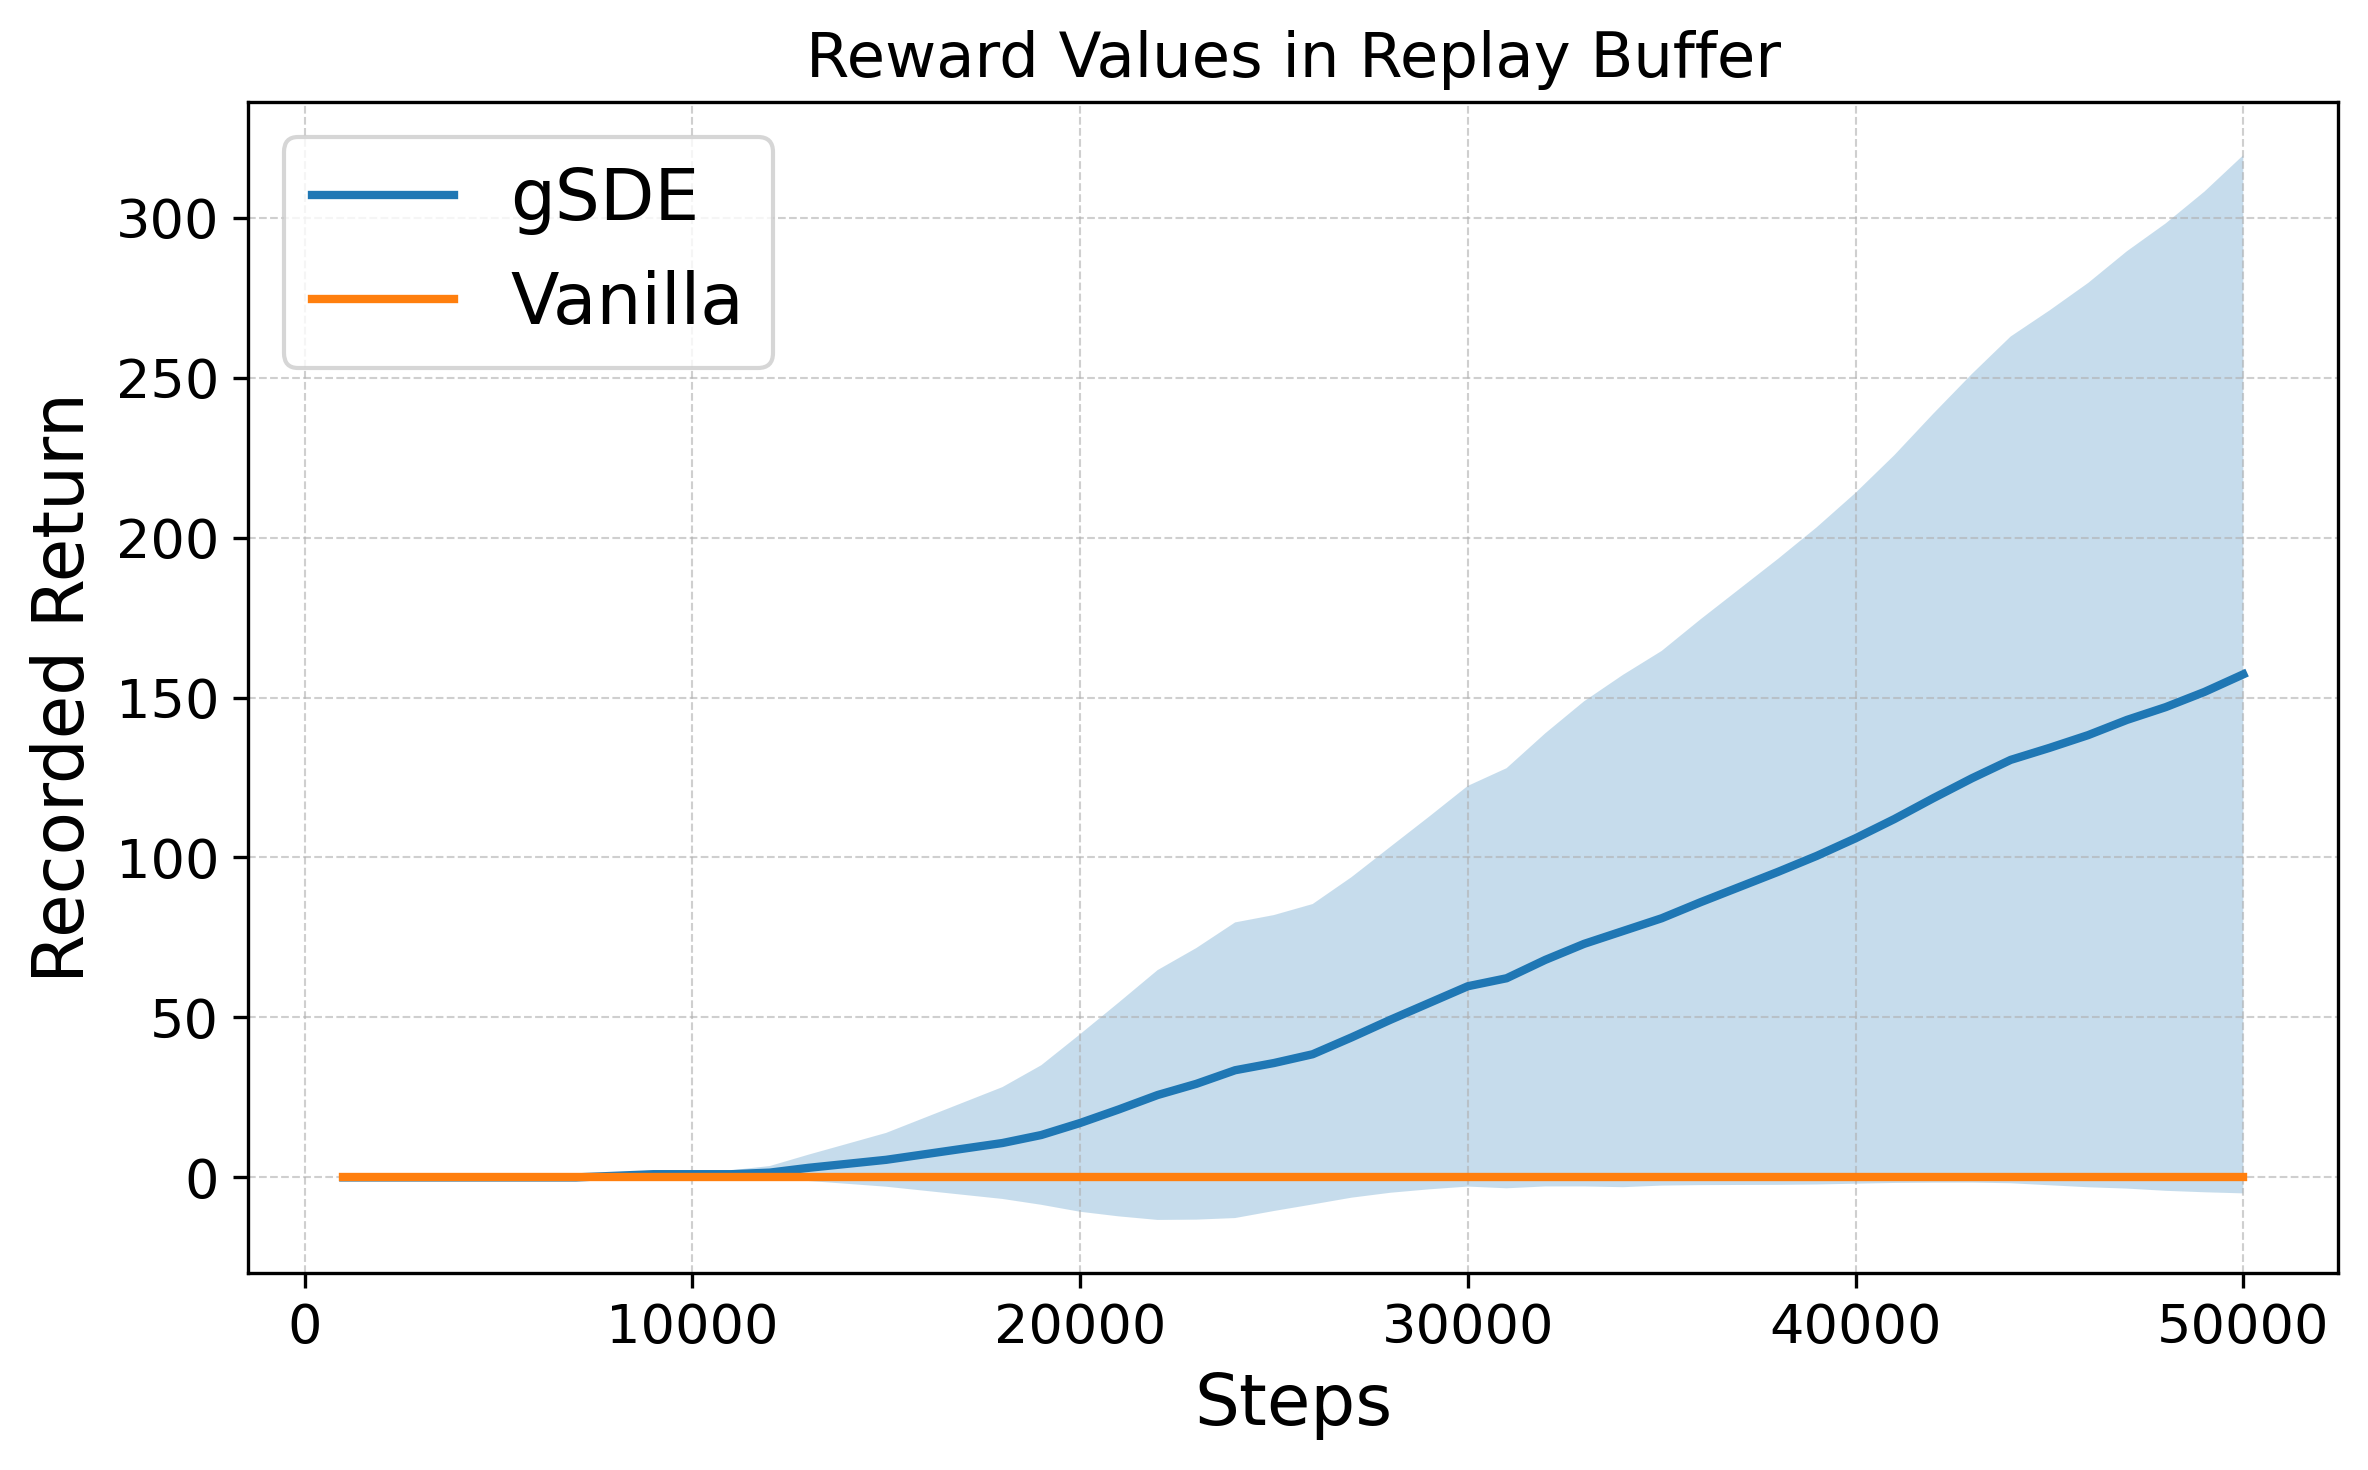

In [3]:
"""
Plot learning curves (mean ± 1 σ over 3 seeds)
==============================================

Expected file naming scheme (adapt to yours!)
    SAC_<env>_use_sde{0|1}_train_freq{1|32}_gradient_step{1|32}_seed<SEED>.npz

Each .npz must contain at least the array  ``eval_returns``  with shape (T, 2)
    eval_returns[:,0]  → global training step
    eval_returns[:,1]  → evaluation return at that step
"""

import glob, json, math, pathlib
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------ #
# 1)  Declare the patterns for every configuration you’d like to draw
# ------------------------------------------------------------------ #
patterns = {
    "gSDE":   "SAC_MountainCarContinuous-v0_a-0.1_lr-0.0003_tf-32_gd-32_sde-1_s-*.npz",
    "Vanilla":   "SAC_MountainCarContinuous-v0_a-0.1_lr-0.0003_tf-32_gd-32_sde-0_s-*.npz",
}


# 
# ------------------------------------------------------------------ #
# 2)  Helper – read one run and turn it into {step: return} dict
# ------------------------------------------------------------------ #
def load_eval_dict(npz_path):
    d      = np.load(npz_path, allow_pickle=True)
    steps  = d["buffer_stats"][:, 0].astype(int)
    rets   = d["buffer_stats"][:, 5].astype(float)
    return dict(zip(steps, rets))

# ------------------------------------------------------------------ #
# 3)  Aggregate across seeds, interpolate onto a common step grid
# ------------------------------------------------------------------ #
plt.figure(figsize=(8, 5), dpi=300)

for label, pattern in patterns.items():
    files = sorted(glob.glob("./runs/"+pattern))
    if len(files) == 0:
        print(f"⚠️  no files matched “{pattern}” – skipped")
        continue
    print(f"{label:18s}: {len(files)} run(s)")

    # collect dicts and a joint step grid
    runs_dict = [load_eval_dict(f) for f in files]
    all_steps = np.array(sorted(set(chain.from_iterable(d.keys() for d in runs_dict))))

    # interpolate each run onto all_steps
    interp_runs = []
    for d in runs_dict:
        # numpy interpolation needs sorted x; we already have all_steps sorted
        run_steps, run_vals = zip(*sorted(d.items()))
        interp = np.interp(all_steps, run_steps, run_vals)
        interp_runs.append(interp)
    interp_runs = np.vstack(interp_runs)        # shape (n_seeds, n_steps)

    mean = interp_runs.mean(axis=0)
    std  = interp_runs.std(axis=0)

    # ------------------------------------------------------------------ #
    # 4)  Plot mean curve with ±1 σ shaded band
    # ------------------------------------------------------------------ #
    plt.plot(all_steps, mean, label=label, linewidth=2)
    plt.fill_between(all_steps, mean - std, mean + std, alpha=0.25)

# ------------------------------------------------------------------ #
# 5)  Cosmetics
# ------------------------------------------------------------------ #
plt.xlabel("Steps", fontsize=17)
plt.ylabel("Recorded Return", fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("Reward Values in Replay Buffer", fontsize=15)
plt.legend(loc="upper left", fontsize=17)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.savefig("figures/sde_compare_reward_replay.png")
plt.show()


gSDE              : 4 run(s)
Vanilla           : 4 run(s)


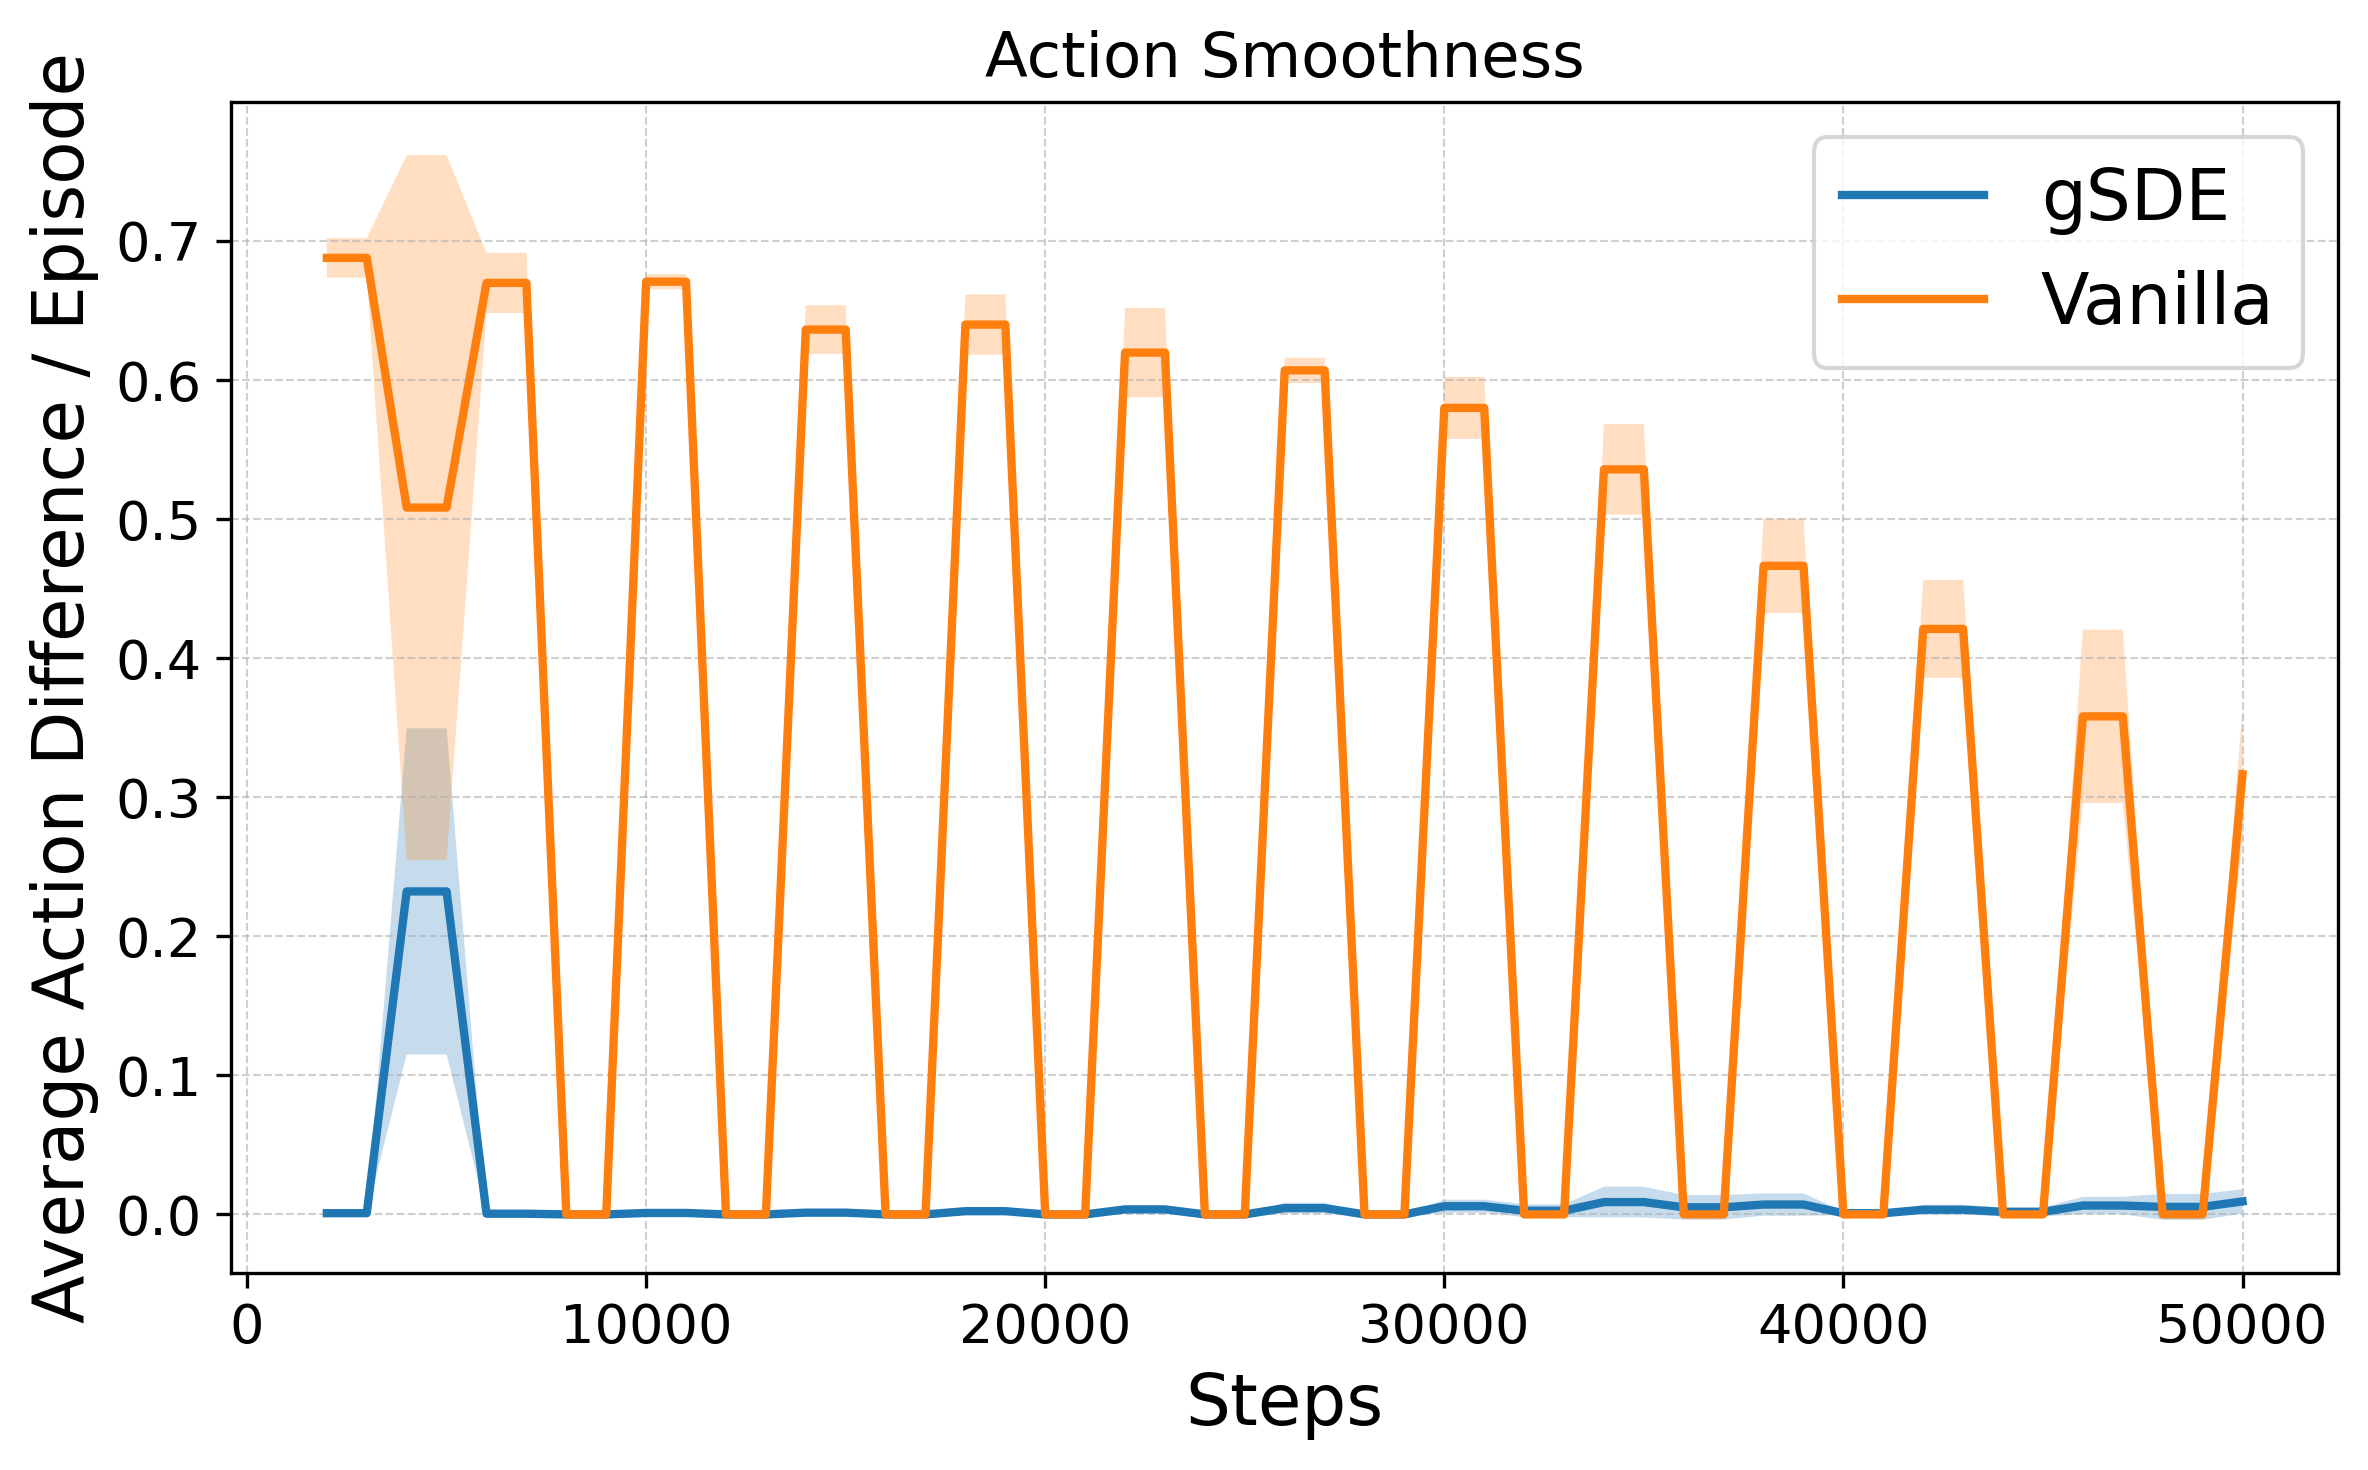

In [4]:
"""
Plot learning curves (mean ± 1 σ over 3 seeds)
==============================================

Expected file naming scheme (adapt to yours!)
    SAC_<env>_use_sde{0|1}_train_freq{1|32}_gradient_step{1|32}_seed<SEED>.npz

Each .npz must contain at least the array  ``eval_returns``  with shape (T, 2)
    eval_returns[:,0]  → global training step
    eval_returns[:,1]  → evaluation return at that step
"""

import glob, json, math, pathlib
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------ #
# 1)  Declare the patterns for every configuration you’d like to draw
# ------------------------------------------------------------------ #
patterns = {
    "gSDE":   "SAC_MountainCarContinuous-v0_a-0.1_lr-0.0003_tf-32_gd-32_sde-1_s-*.npz",
    "Vanilla":   "SAC_MountainCarContinuous-v0_a-0.1_lr-0.0003_tf-32_gd-32_sde-0_s-*.npz",
}


# 
# ------------------------------------------------------------------ #
# 2)  Helper – read one run and turn it into {step: return} dict
# ------------------------------------------------------------------ #
def load_eval_dict(npz_path):
    d      = np.load(npz_path, allow_pickle=True)
    steps  = d["buffer_stats"][:, 0][1:].astype(int)
    rets   = d["action_jitters"][:].astype(float)
    return dict(zip(steps, rets))

# ------------------------------------------------------------------ #
# 3)  Aggregate across seeds, interpolate onto a common step grid
# ------------------------------------------------------------------ #
plt.figure(figsize=(8, 5), dpi=300)

for label, pattern in patterns.items():
    files = sorted(glob.glob("./runs/"+pattern))
    if len(files) == 0:
        print(f"⚠️  no files matched “{pattern}” – skipped")
        continue
    print(f"{label:18s}: {len(files)} run(s)")

    # collect dicts and a joint step grid
    runs_dict = [load_eval_dict(f) for f in files]
    all_steps = np.array(sorted(set(chain.from_iterable(d.keys() for d in runs_dict))))

    # interpolate each run onto all_steps
    interp_runs = []
    for d in runs_dict:
        # numpy interpolation needs sorted x; we already have all_steps sorted
        run_steps, run_vals = zip(*sorted(d.items()))
        interp = np.interp(all_steps, run_steps, run_vals)
        interp_runs.append(interp)
    interp_runs = np.vstack(interp_runs)        # shape (n_seeds, n_steps)

    mean = interp_runs.mean(axis=0)
    std  = interp_runs.std(axis=0)

    # ------------------------------------------------------------------ #
    # 4)  Plot mean curve with ±1 σ shaded band
    # ------------------------------------------------------------------ #
    plt.plot(all_steps, mean, label=label, linewidth=2)
    plt.fill_between(all_steps, mean - std, mean + std, alpha=0.25)

# ------------------------------------------------------------------ #
# 5)  Cosmetics
# ------------------------------------------------------------------ #
plt.xlabel("Steps", fontsize=17)
plt.ylabel("Average Action Difference / Episode", fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("Action Smoothness", fontsize=15)
plt.legend(loc="upper right", fontsize=17)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.savefig("figures/sde_compare_action_jitter.png")
plt.show()


bs 256            : 4 run(s)
bs 512            : 4 run(s)
bs 1024           : 4 run(s)


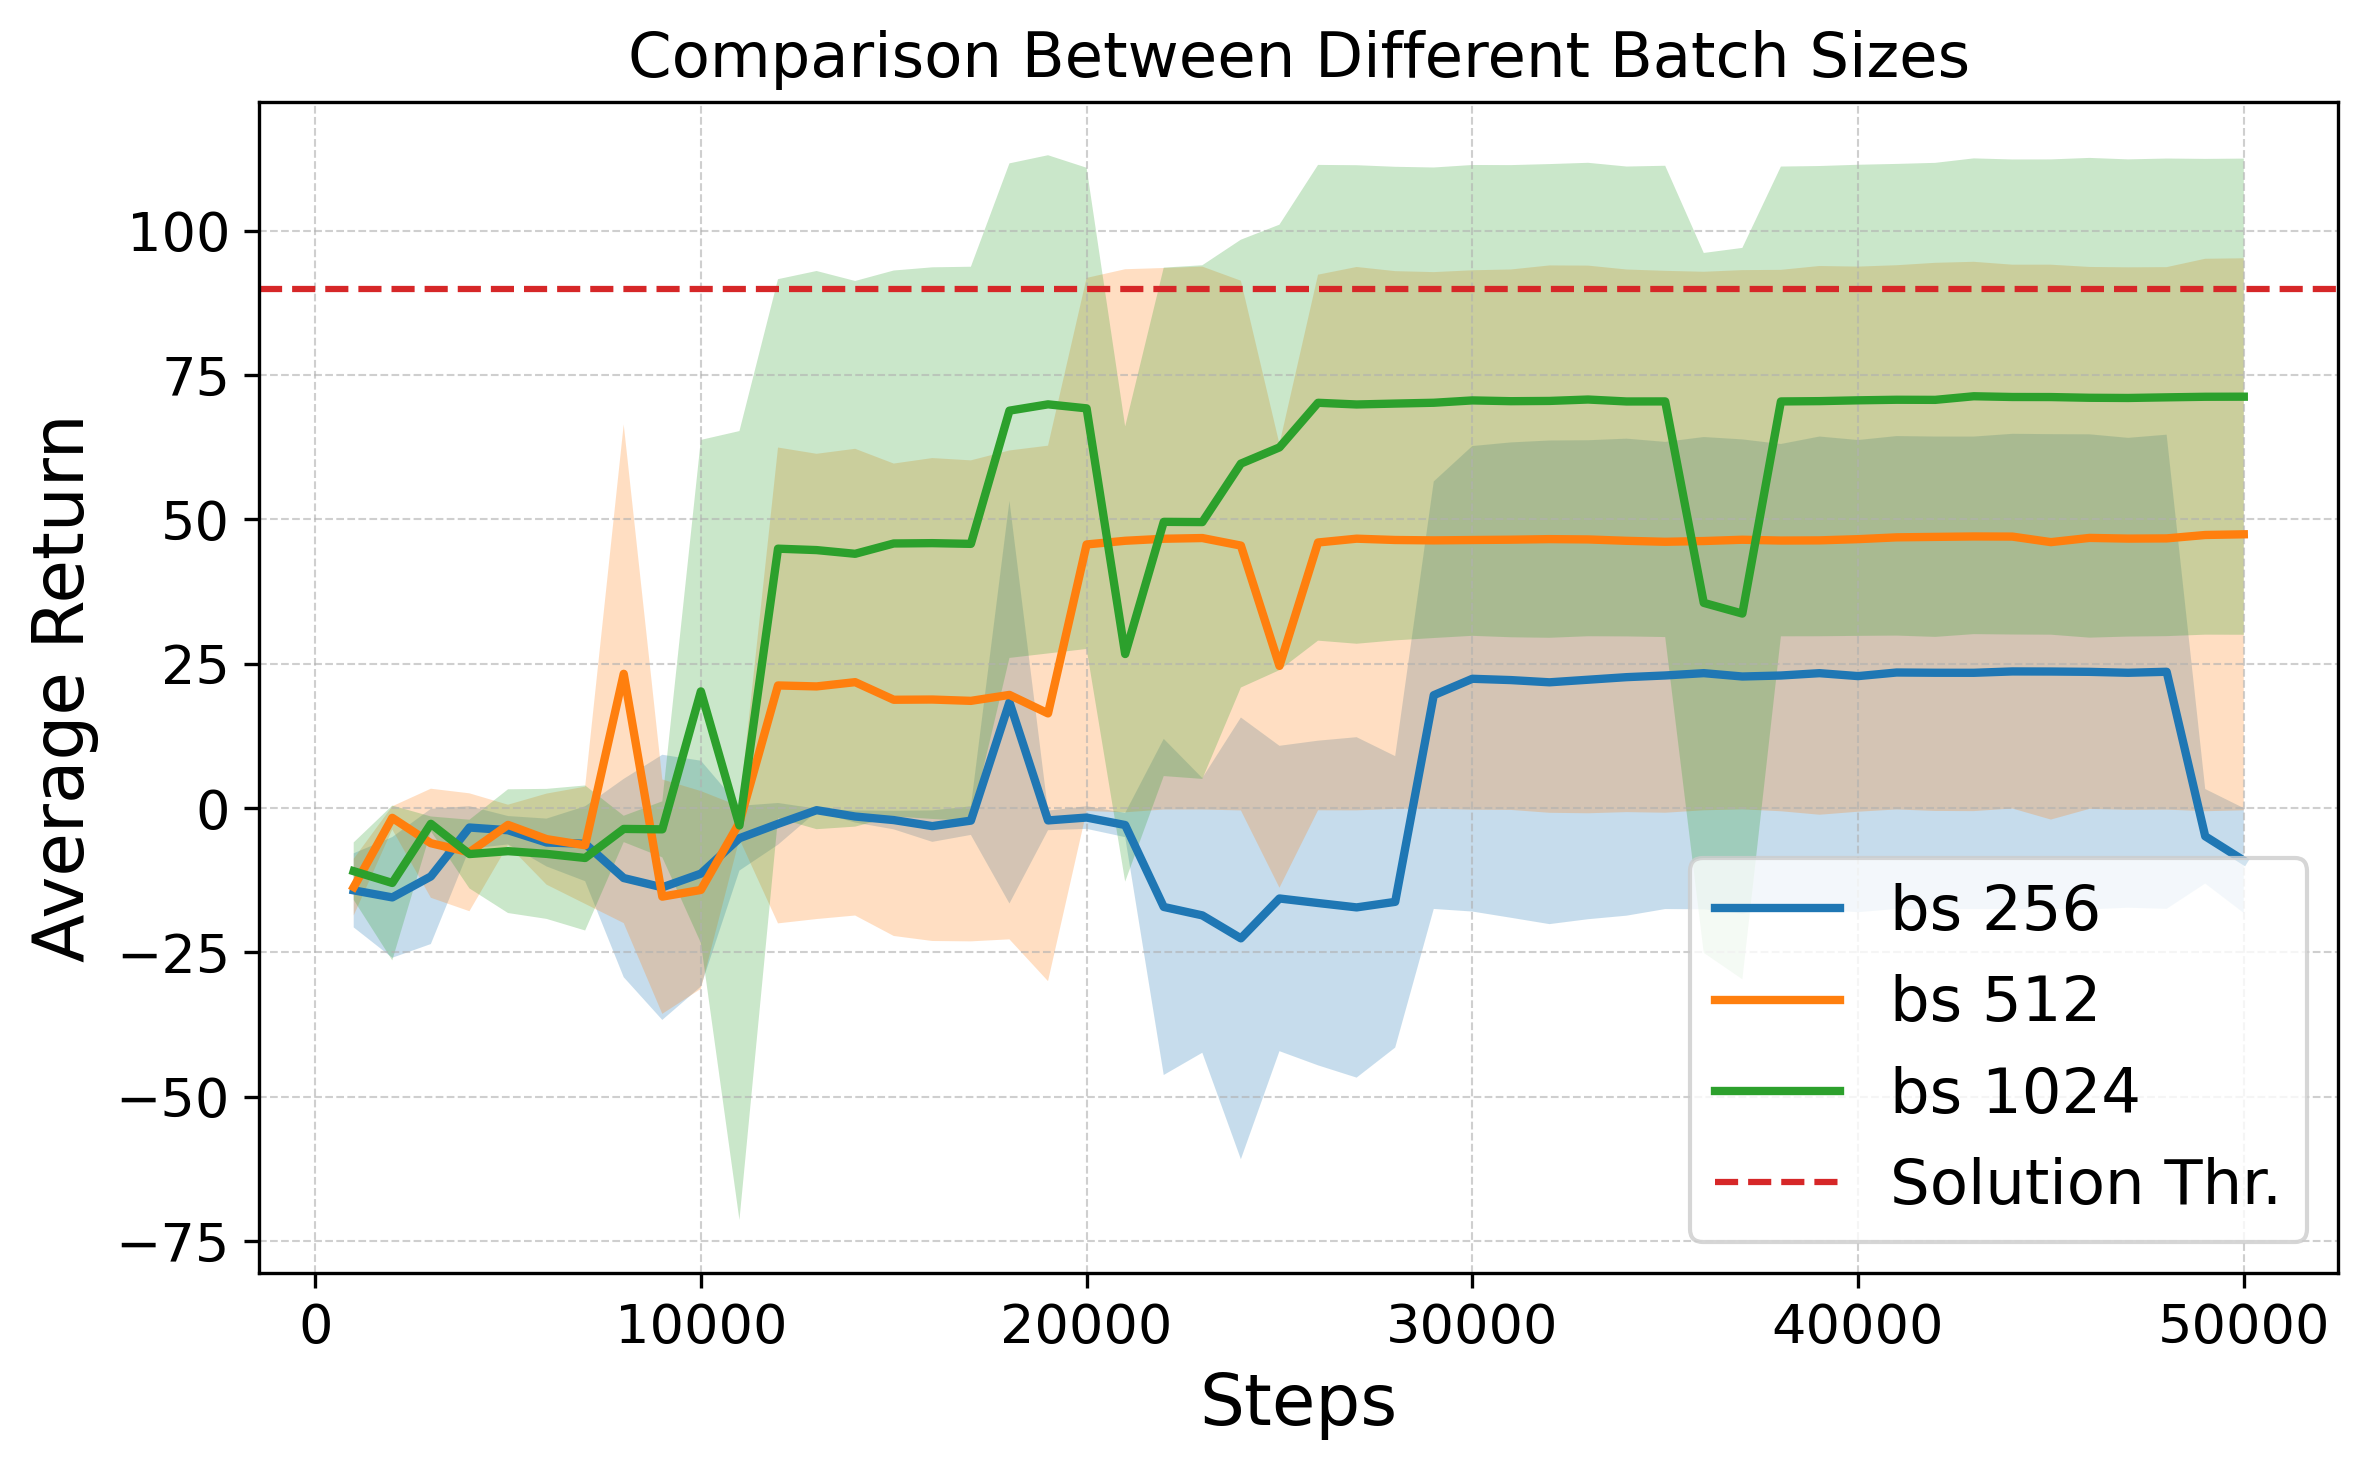

In [8]:
"""
Plot learning curves (mean ± 1 σ over 3 seeds)
==============================================

Expected file naming scheme (adapt to yours!)
    SAC_<env>_use_sde{0|1}_train_freq{1|32}_gradient_step{1|32}_seed<SEED>.npz

Each .npz must contain at least the array  ``eval_returns``  with shape (T, 2)
    eval_returns[:,0]  → global training step
    eval_returns[:,1]  → evaluation return at that step
"""

import glob, json, math, pathlib
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------ #
# 1)  Declare the patterns for every configuration you’d like to draw
# ------------------------------------------------------------------ #
patterns = {
    "bs 256":   "SAC_MountainCarContinuous-v0_a-0.1_lr-0.00015_bs-256_tf-32_gd-64_sde-1_s-*.npz",
    "bs 512":   "SAC_MountainCarContinuous-v0_a-0.1_lr-0.0003_tf-32_gd-32_sde-1_s-*.npz",
    "bs 1024":   "SAC_MountainCarContinuous-v0_a-0.1_lr-0.0006_bs-1024_tf-32_gd-32_sde-1_s-*.npz",
    # "bs 2048":   "SAC_MountainCarContinuous-v0_a-0.1_lr-0.0012_bs-2048_tf-32_gd-32_sde-1_s-*.npz",
    # "bs 4096":   "SAC_MountainCarContinuous-v0_a-0.1_lr-0.0024_bs-4096_tf-32_gd-32_sde-1_s-*.npz",
    # "train freq 64":   "SAC_MountainCarContinuous-v0_a-0.1_lr-0.0003_tf-64_gd-64_sde-1_s-*.npz",
}


# 
# ------------------------------------------------------------------ #
# 2)  Helper – read one run and turn it into {step: return} dict
# ------------------------------------------------------------------ #
def load_eval_dict(npz_path):
    d      = np.load(npz_path, allow_pickle=True)
    steps  = d["eval_returns"][:, 0].astype(int)
    rets   = d["eval_returns"][:, 1].astype(float)
    return dict(zip(steps, rets))

# ------------------------------------------------------------------ #
# 3)  Aggregate across seeds, interpolate onto a common step grid
# ------------------------------------------------------------------ #
plt.figure(figsize=(8, 5), dpi=300)

for label, pattern in patterns.items():
    files = sorted(glob.glob("./runs/"+pattern))
    if len(files) == 0:
        print(f"⚠️  no files matched “{pattern}” – skipped")
        continue
    print(f"{label:18s}: {len(files)} run(s)")

    # collect dicts and a joint step grid
    runs_dict = [load_eval_dict(f) for f in files]
    all_steps = np.array(sorted(set(chain.from_iterable(d.keys() for d in runs_dict))))

    # interpolate each run onto all_steps
    interp_runs = []
    for d in runs_dict:
        # numpy interpolation needs sorted x; we already have all_steps sorted
        run_steps, run_vals = zip(*sorted(d.items()))
        interp = np.interp(all_steps, run_steps, run_vals)
        interp_runs.append(interp)
    interp_runs = np.vstack(interp_runs)        # shape (n_seeds, n_steps)

    mean = interp_runs.mean(axis=0)
    std  = interp_runs.std(axis=0)

    # ------------------------------------------------------------------ #
    # 4)  Plot mean curve with ±1 σ shaded band
    # ------------------------------------------------------------------ #
    plt.plot(all_steps, mean, label=label, linewidth=2)
    plt.fill_between(all_steps, mean - std, mean + std, alpha=0.25)

# ------------------------------------------------------------------ #
# 5)  Cosmetics
# ------------------------------------------------------------------ #
plt.xlabel("Steps", fontsize=17)
plt.ylabel("Average Return", fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.axhline(y=90, color = "#d62728", linestyle='--', linewidth=1.5, label='Solution Thr.')
plt.title("Comparison Between Different Batch Sizes", fontsize=15)
plt.legend(loc="lower right", fontsize=15)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.savefig("figures/bs-lr.png")
plt.show()


bs 256            : 3 run(s)
bs 512            : 3 run(s)
bs 1024           : 3 run(s)


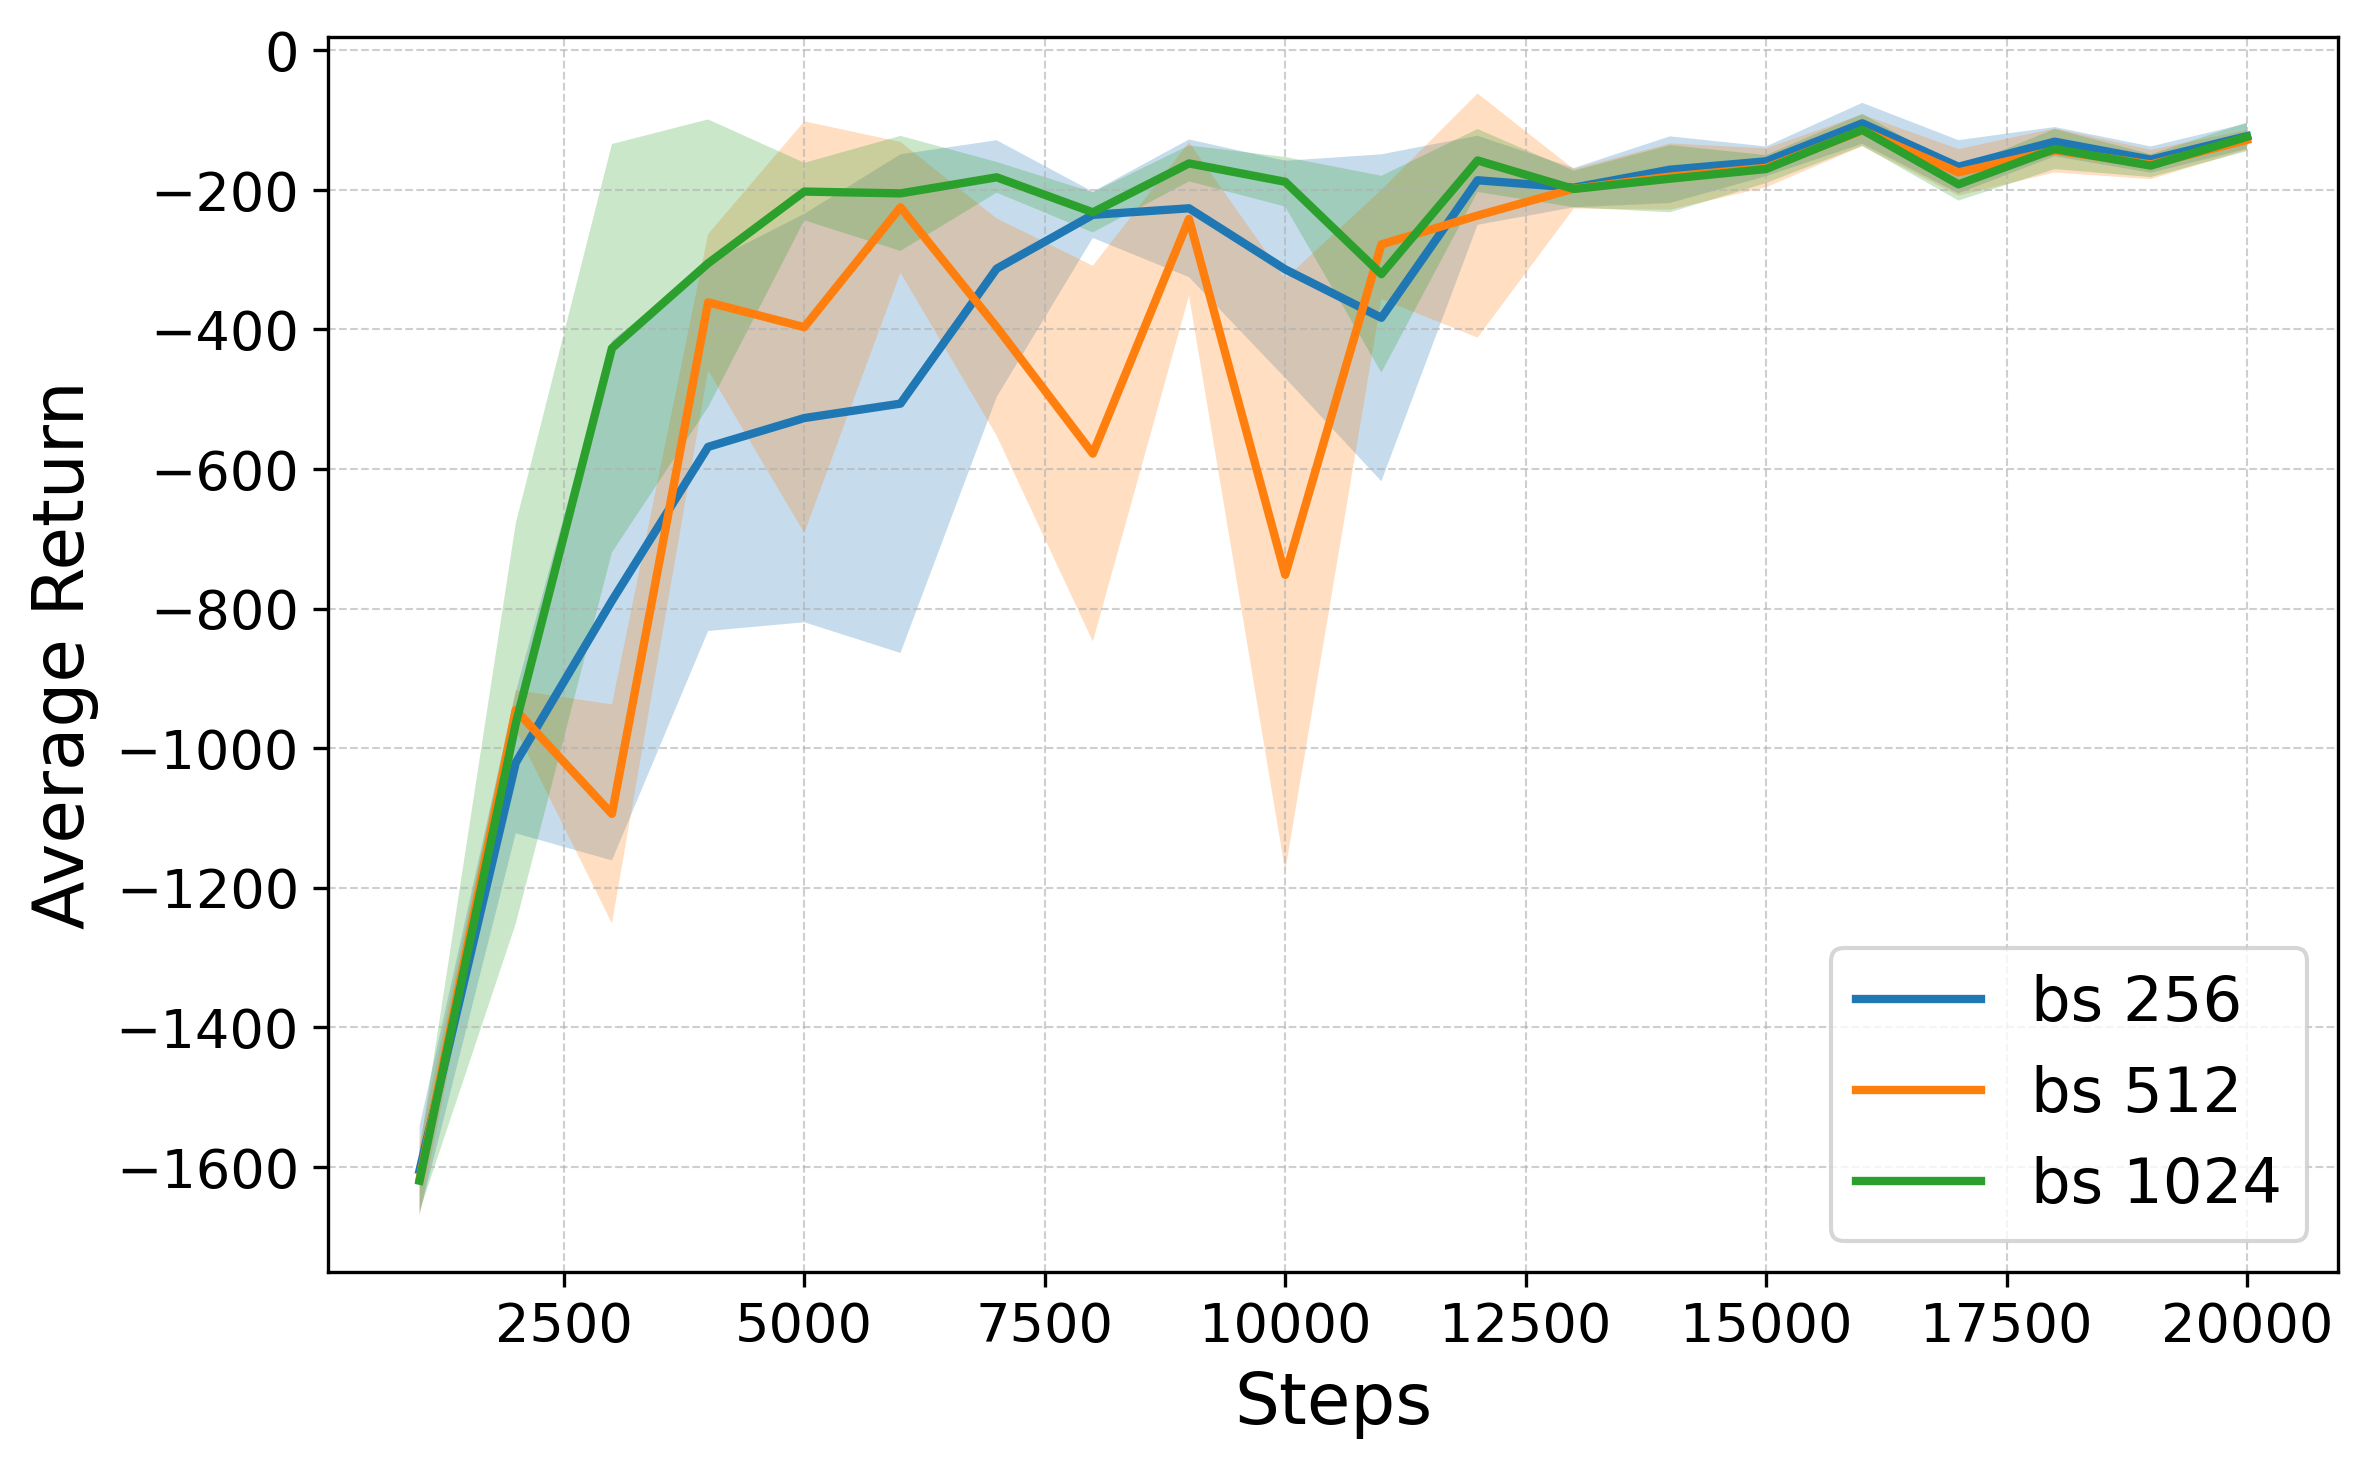

In [2]:
"""
Plot learning curves (mean ± 1 σ over 3 seeds)
==============================================

Expected file naming scheme (adapt to yours!)
    SAC_<env>_use_sde{0|1}_train_freq{1|32}_gradient_step{1|32}_seed<SEED>.npz

Each .npz must contain at least the array  ``eval_returns``  with shape (T, 2)
    eval_returns[:,0]  → global training step
    eval_returns[:,1]  → evaluation return at that step
"""

import glob, json, math, pathlib
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------ #
# 1)  Declare the patterns for every configuration you’d like to draw
# ------------------------------------------------------------------ #
# patterns = {
#     r"$\alpha$ 0.1":   "SAC_MountainCarContinuous-v0_a-0.1_lr-0.0003_tf-32_gd-32_sde-1_s-*.npz",
#     r"$\alpha$ 2.0":   "SAC_MountainCarContinuous-v0_a-2.0_lr-0.0003_tf-32_gd-32_sde-1_s-*.npz",
#     # r"$\alpha$ 0.01":   "SAC_MountainCarContinuous-v0_a-0.01_lr-0.0003_tf-32_gd-32_sde-1_s-*.npz",
#     # "train freq 64":   "SAC_MountainCarContinuous-v0_a-0.1_lr-0.0003_tf-64_gd-64_sde-1_s-*.npz",
# }

# SAC_Pendulum-v1_a-0.1_d-64_tau-0.005_lr-0.001_bs-256_tf-1_gd-1_sde-0_s-0
patterns = {
    "bs 256":   "SAC_Pendulum-v1_a-0.1_d-256_tau-0.005_lr-0.001_bs-256_tf-1_gd-1_sde-0_s-*.npz",
    "bs 512":   "SAC_Pendulum-v1_a-0.1_d-256_tau-0.005_lr-0.001_bs-512_tf-1_gd-1_sde-0_s-*.npz",
    "bs 1024":   "SAC_Pendulum-v1_a-0.1_d-256_tau-0.005_lr-0.001_bs-1024_tf-1_gd-1_sde-0_s-*.npz",
}



# ------------------------------------------------------------------ #
# 2)  Helper – read one run and turn it into {step: return} dict
# ------------------------------------------------------------------ #
def load_eval_dict(npz_path):
    d      = np.load(npz_path, allow_pickle=True)
    steps  = d["eval_returns"][:, 0].astype(int)
    rets   = d["eval_returns"][:, 1].astype(float)
    return dict(zip(steps, rets))

# ------------------------------------------------------------------ #
# 3)  Aggregate across seeds, interpolate onto a common step grid
# ------------------------------------------------------------------ #
plt.figure(figsize=(8, 5), dpi=300)

for label, pattern in patterns.items():
    files = sorted(glob.glob("./runs/"+pattern))
    if len(files) == 0:
        print(f"⚠️  no files matched “{pattern}” – skipped")
        continue
    print(f"{label:18s}: {len(files)} run(s)")

    # collect dicts and a joint step grid
    runs_dict = [load_eval_dict(f) for f in files]
    all_steps = np.array(sorted(set(chain.from_iterable(d.keys() for d in runs_dict))))

    # interpolate each run onto all_steps
    interp_runs = []
    for d in runs_dict:
        # numpy interpolation needs sorted x; we already have all_steps sorted
        run_steps, run_vals = zip(*sorted(d.items()))
        interp = np.interp(all_steps, run_steps, run_vals)
        interp_runs.append(interp)
    interp_runs = np.vstack(interp_runs)        # shape (n_seeds, n_steps)

    mean = interp_runs.mean(axis=0)
    std  = interp_runs.std(axis=0)

    # ------------------------------------------------------------------ #
    # 4)  Plot mean curve with ±1 σ shaded band
    # ------------------------------------------------------------------ #
    plt.plot(all_steps, mean, label=label, linewidth=2)
    plt.fill_between(all_steps, mean - std, mean + std, alpha=0.25)

# ------------------------------------------------------------------ #
# 5)  Cosmetics
# ------------------------------------------------------------------ #
plt.xlabel("Steps", fontsize=17)
plt.ylabel("Average Return", fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# plt.axhline(y=90, color = "#d62728", linestyle='--', linewidth=1.5, label='Solution Thr.')
# plt.title("Soft Actor-Critic on MountainCarContinuous-v0\nmean ± 1 σ over 3 seeds")
plt.legend(loc="lower right", fontsize=15)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.savefig("figures/p_bs.png")
plt.show()


lr 0.0001         : 3 run(s)
lr 0.001          : 3 run(s)
lr 0.005          : 3 run(s)
lr 0.01           : 3 run(s)


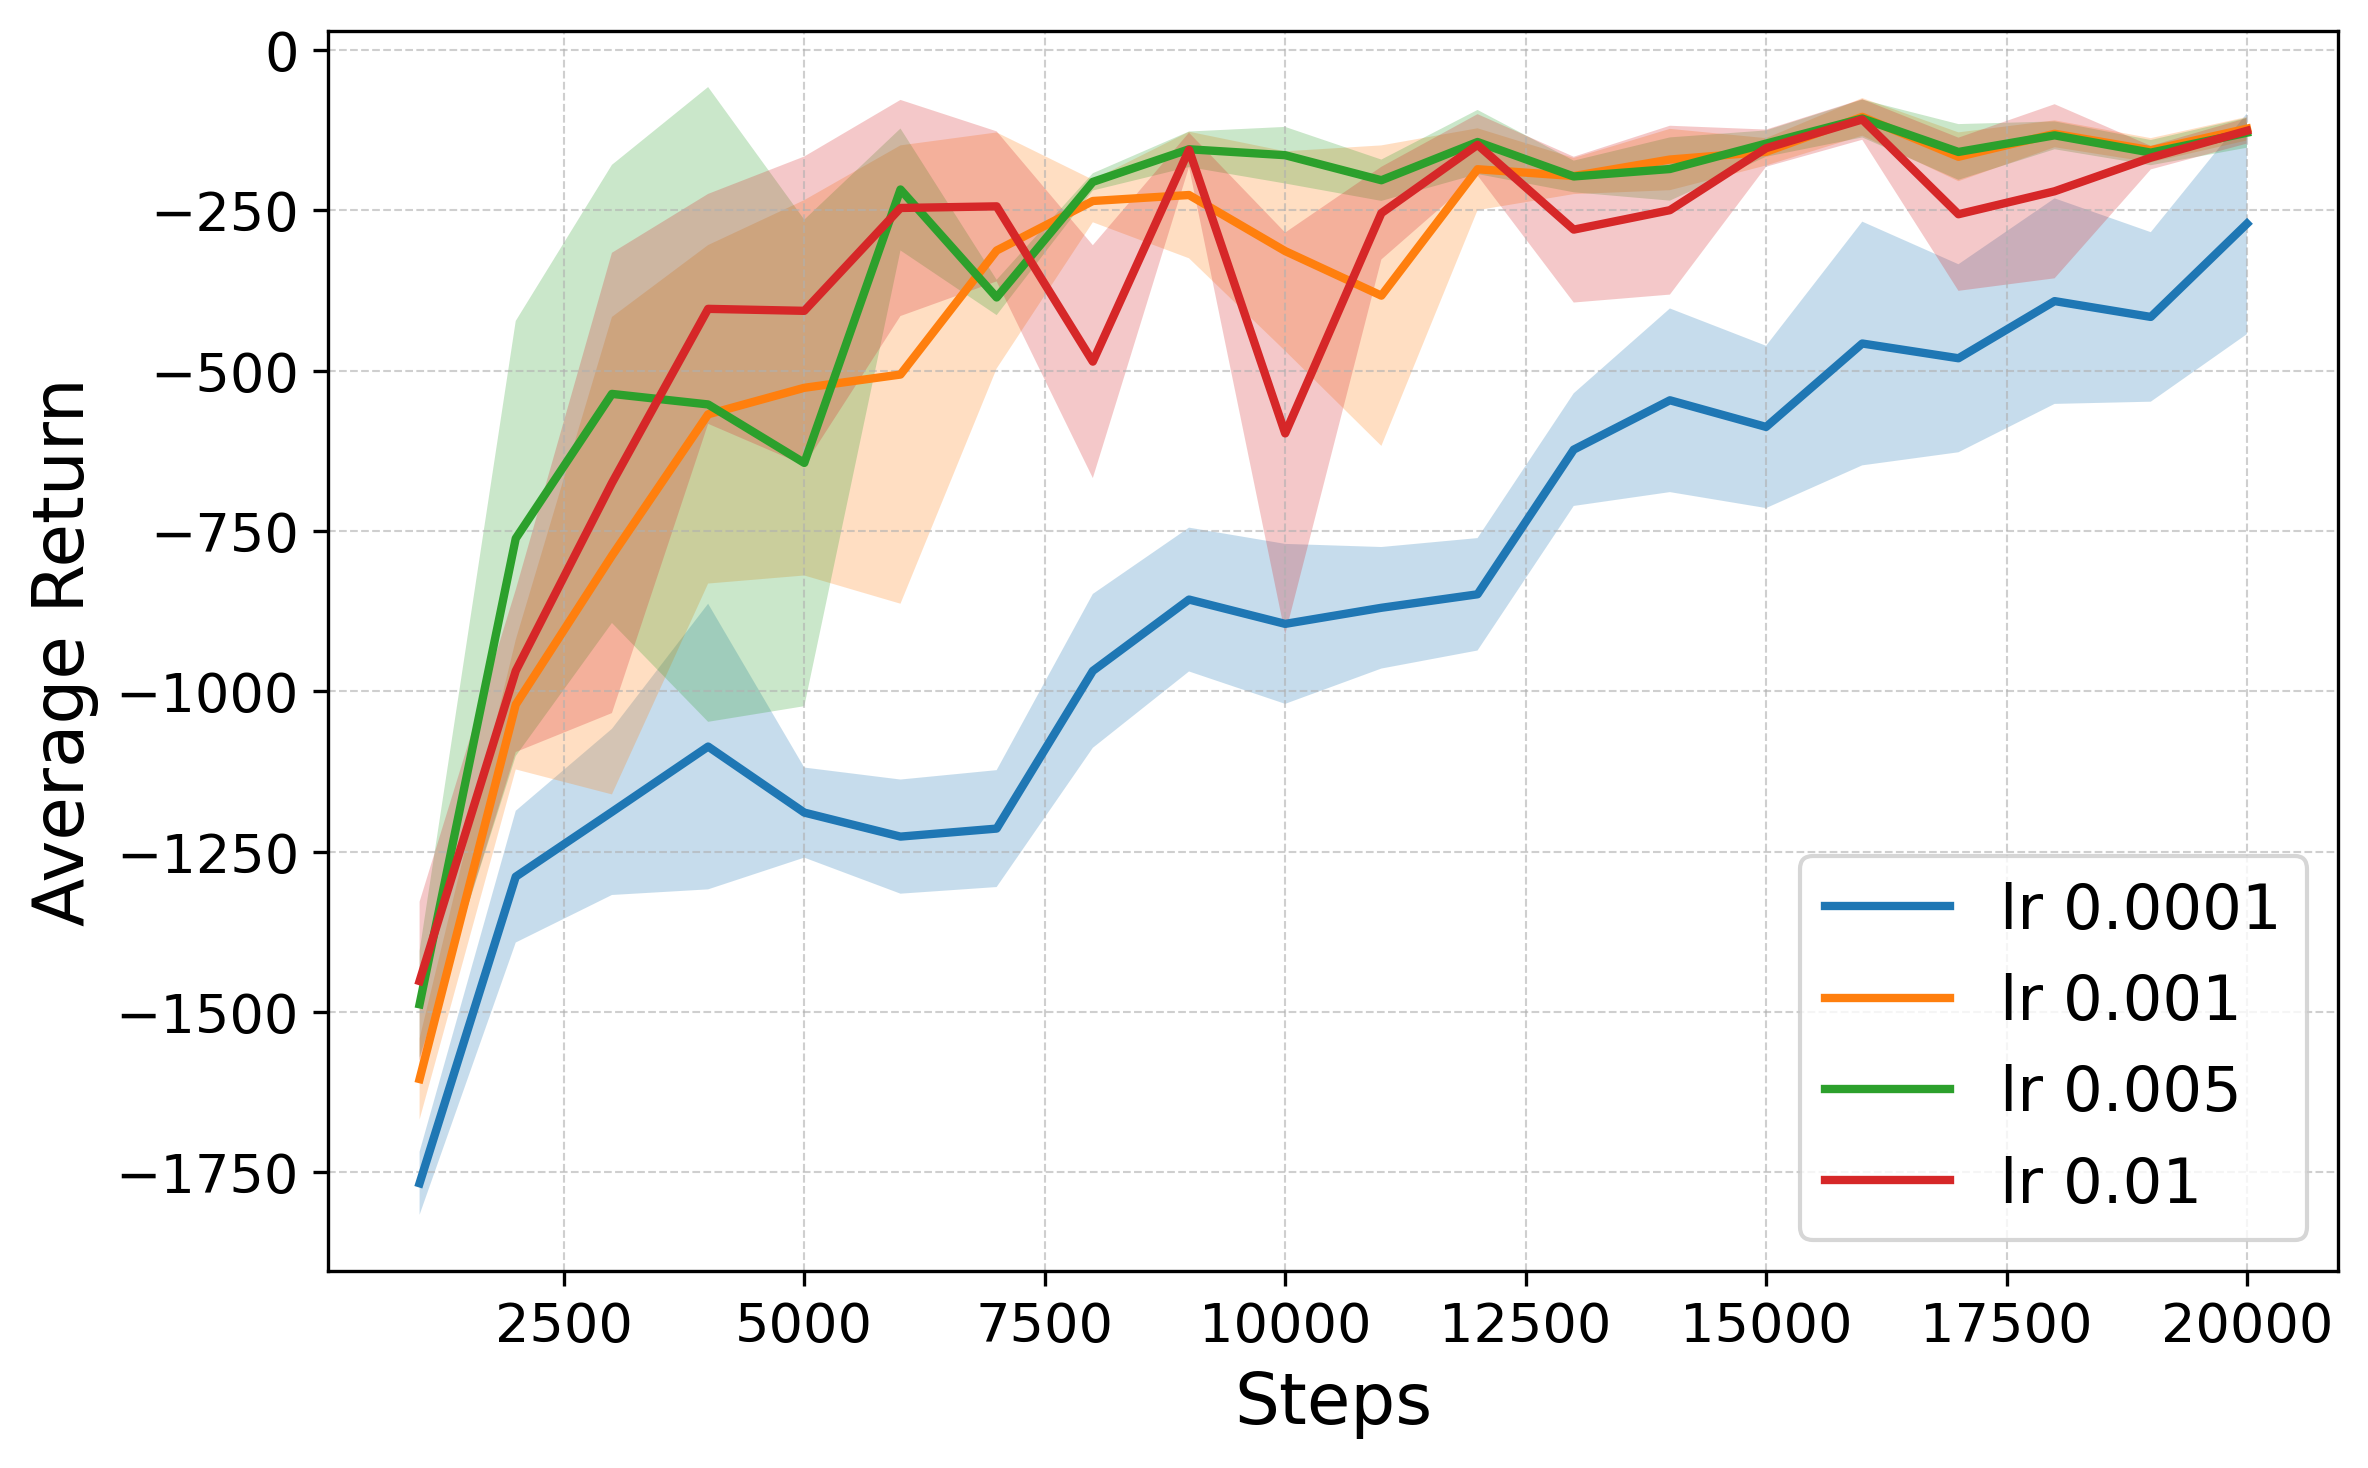

In [3]:
"""
Plot learning curves (mean ± 1 σ over 3 seeds)
==============================================

Expected file naming scheme (adapt to yours!)
    SAC_<env>_use_sde{0|1}_train_freq{1|32}_gradient_step{1|32}_seed<SEED>.npz

Each .npz must contain at least the array  ``eval_returns``  with shape (T, 2)
    eval_returns[:,0]  → global training step
    eval_returns[:,1]  → evaluation return at that step
"""

import glob, json, math, pathlib
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------ #
# 1)  Declare the patterns for every configuration you’d like to draw
# ------------------------------------------------------------------ #
# patterns = {
#     r"$\alpha$ 0.1":   "SAC_MountainCarContinuous-v0_a-0.1_lr-0.0003_tf-32_gd-32_sde-1_s-*.npz",
#     r"$\alpha$ 2.0":   "SAC_MountainCarContinuous-v0_a-2.0_lr-0.0003_tf-32_gd-32_sde-1_s-*.npz",
#     # r"$\alpha$ 0.01":   "SAC_MountainCarContinuous-v0_a-0.01_lr-0.0003_tf-32_gd-32_sde-1_s-*.npz",
#     # "train freq 64":   "SAC_MountainCarContinuous-v0_a-0.1_lr-0.0003_tf-64_gd-64_sde-1_s-*.npz",
# }

# SAC_Pendulum-v1_a-0.1_d-64_tau-0.005_lr-0.001_bs-256_tf-1_gd-1_sde-0_s-0
patterns = {
    "lr 0.0001":   "SAC_Pendulum-v1_a-0.1_d-256_tau-0.005_lr-0.0001_bs-256_tf-1_gd-1_sde-0_s-*.npz",
    "lr 0.001":   "SAC_Pendulum-v1_a-0.1_d-256_tau-0.005_lr-0.001_bs-256_tf-1_gd-1_sde-0_s-*.npz",
    "lr 0.005":   "SAC_Pendulum-v1_a-0.1_d-256_tau-0.005_lr-0.005_bs-256_tf-1_gd-1_sde-0_s-*.npz",
    "lr 0.01":   "SAC_Pendulum-v1_a-0.1_d-256_tau-0.005_lr-0.01_bs-256_tf-1_gd-1_sde-0_s-*.npz",
}



# ------------------------------------------------------------------ #
# 2)  Helper – read one run and turn it into {step: return} dict
# ------------------------------------------------------------------ #
def load_eval_dict(npz_path):
    d      = np.load(npz_path, allow_pickle=True)
    steps  = d["eval_returns"][:, 0].astype(int)
    rets   = d["eval_returns"][:, 1].astype(float)
    return dict(zip(steps, rets))

# ------------------------------------------------------------------ #
# 3)  Aggregate across seeds, interpolate onto a common step grid
# ------------------------------------------------------------------ #
plt.figure(figsize=(8, 5), dpi=300)

for label, pattern in patterns.items():
    files = sorted(glob.glob("./runs/"+pattern))
    if len(files) == 0:
        print(f"⚠️  no files matched “{pattern}” – skipped")
        continue
    print(f"{label:18s}: {len(files)} run(s)")

    # collect dicts and a joint step grid
    runs_dict = [load_eval_dict(f) for f in files]
    all_steps = np.array(sorted(set(chain.from_iterable(d.keys() for d in runs_dict))))

    # interpolate each run onto all_steps
    interp_runs = []
    for d in runs_dict:
        # numpy interpolation needs sorted x; we already have all_steps sorted
        run_steps, run_vals = zip(*sorted(d.items()))
        interp = np.interp(all_steps, run_steps, run_vals)
        interp_runs.append(interp)
    interp_runs = np.vstack(interp_runs)        # shape (n_seeds, n_steps)

    mean = interp_runs.mean(axis=0)
    std  = interp_runs.std(axis=0)

    # ------------------------------------------------------------------ #
    # 4)  Plot mean curve with ±1 σ shaded band
    # ------------------------------------------------------------------ #
    plt.plot(all_steps, mean, label=label, linewidth=2)
    plt.fill_between(all_steps, mean - std, mean + std, alpha=0.25)

# ------------------------------------------------------------------ #
# 5)  Cosmetics
# ------------------------------------------------------------------ #
plt.xlabel("Steps", fontsize=17)
plt.ylabel("Average Return", fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# plt.axhline(y=90, color = "#d62728", linestyle='--', linewidth=1.5, label='Solution Thr.')
# plt.title("Soft Actor-Critic on MountainCarContinuous-v0\nmean ± 1 σ over 3 seeds")
plt.legend(loc="lower right", fontsize=15)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.savefig("figures/p_lr.png")
plt.show()


d 64              : 3 run(s)
d 128             : 3 run(s)
d 256             : 3 run(s)


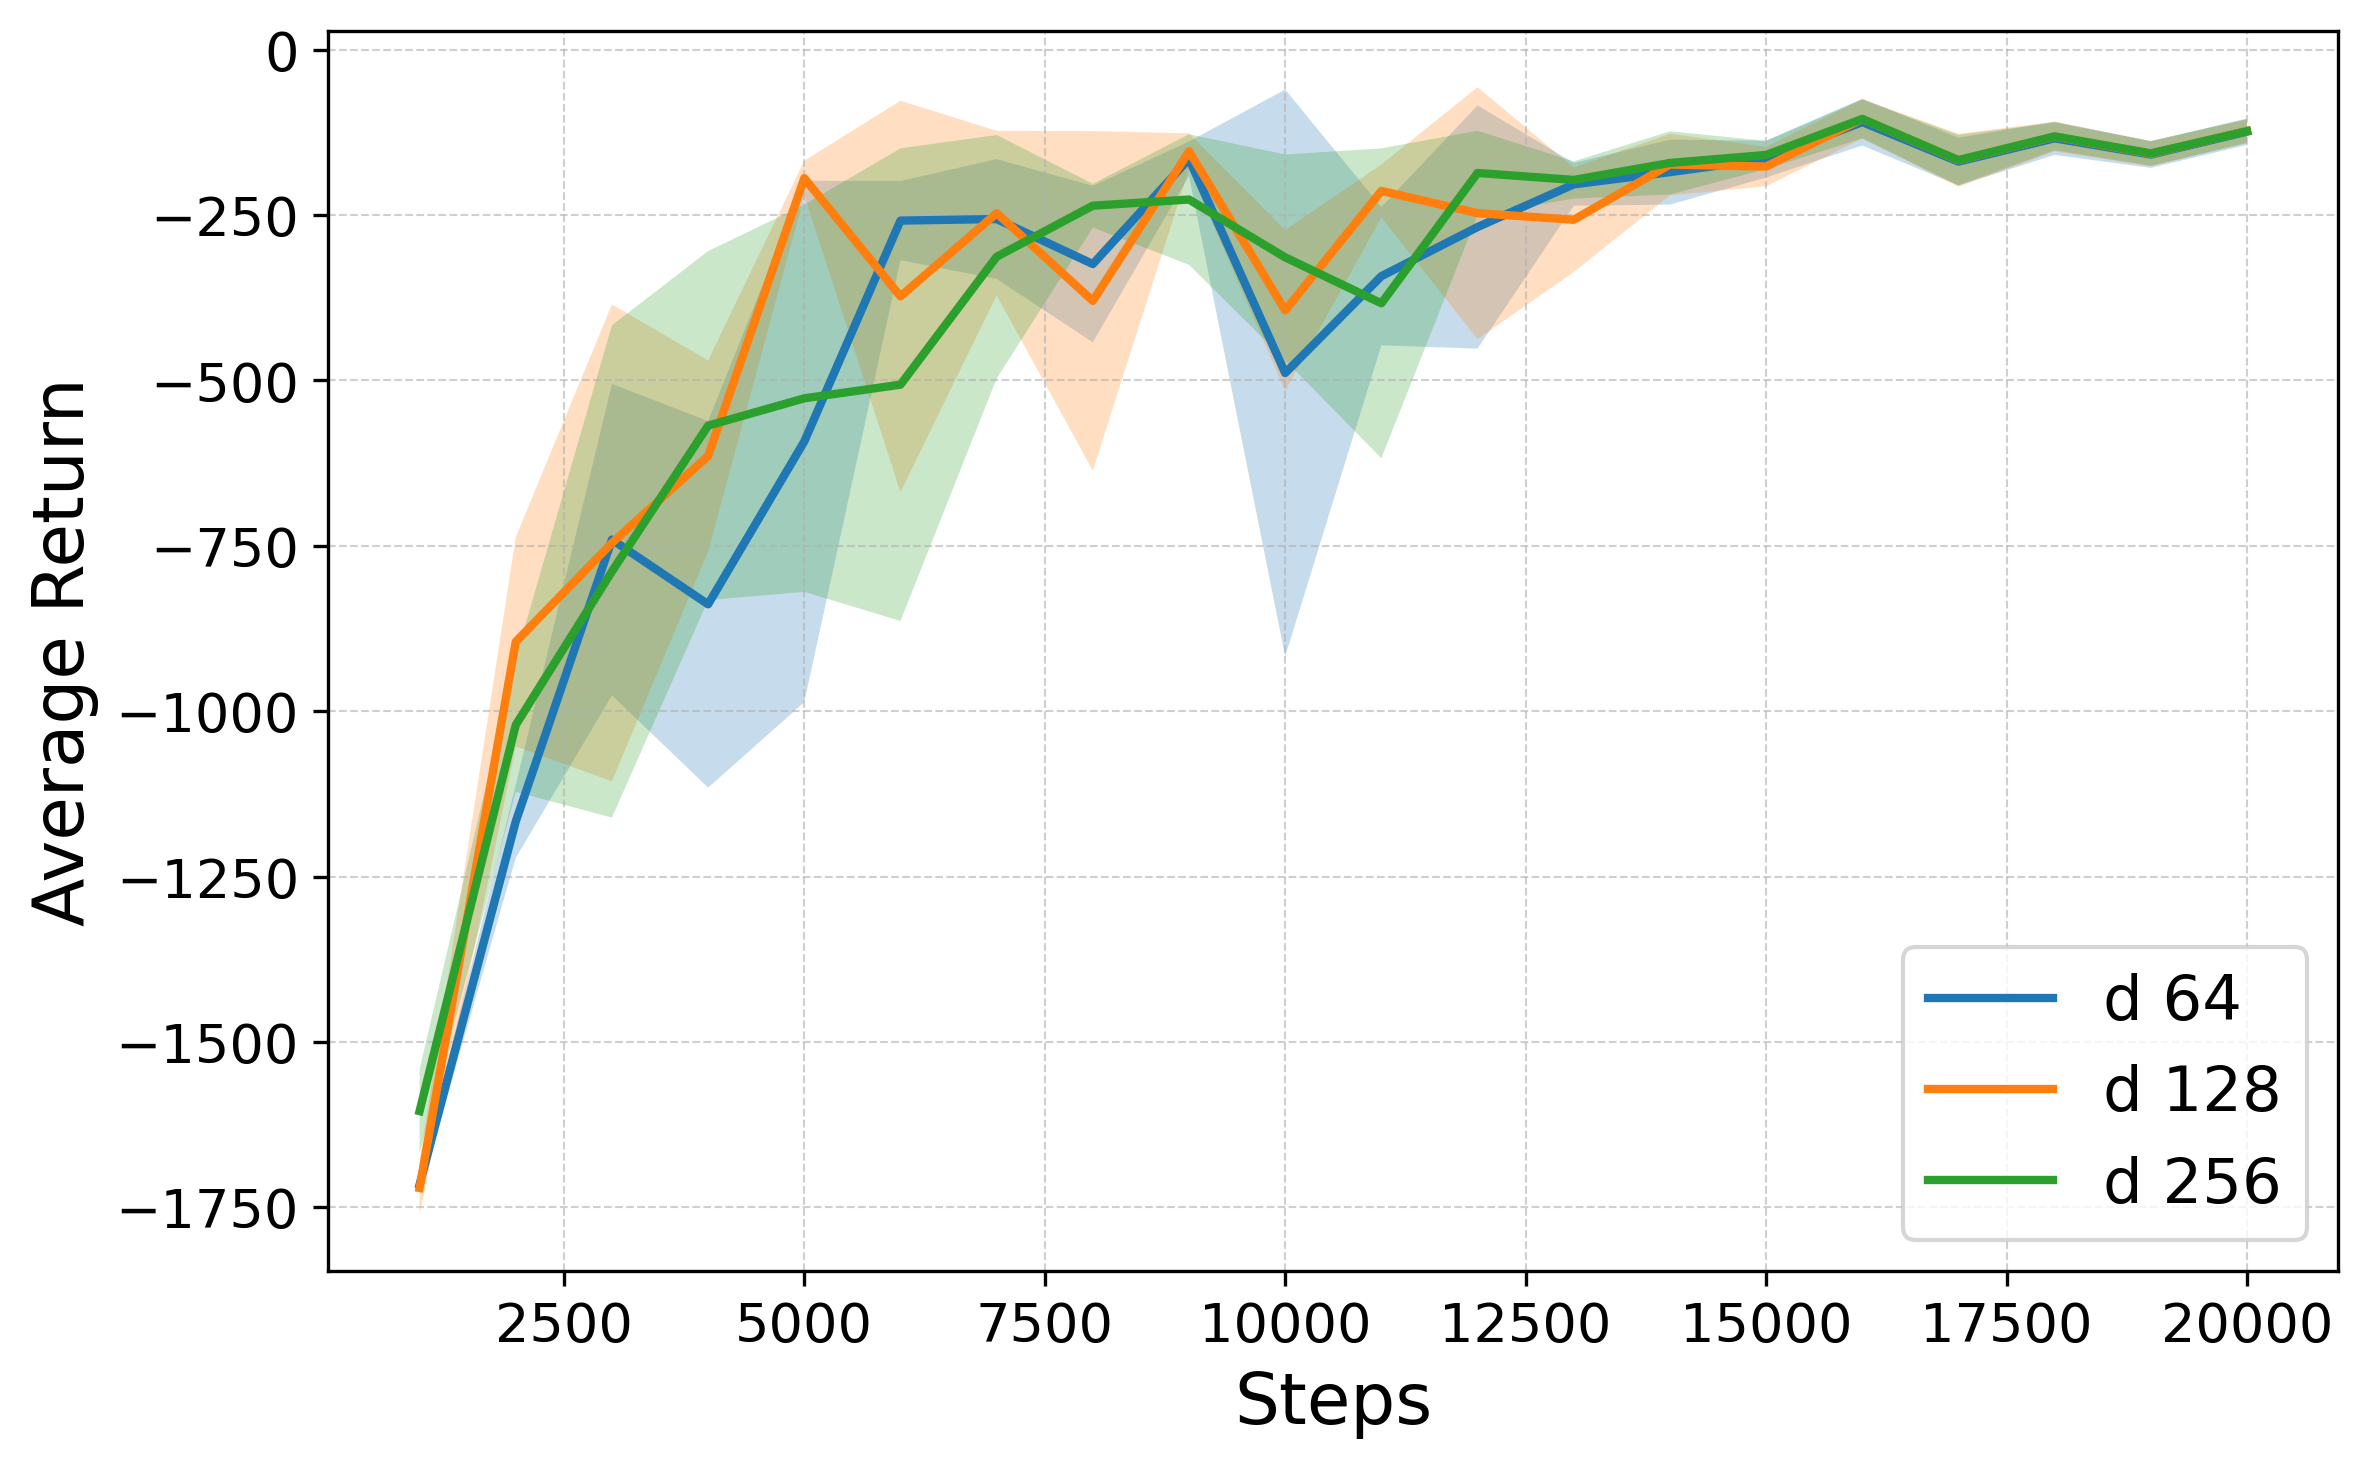

In [4]:
"""
Plot learning curves (mean ± 1 σ over 3 seeds)
==============================================

Expected file naming scheme (adapt to yours!)
    SAC_<env>_use_sde{0|1}_train_freq{1|32}_gradient_step{1|32}_seed<SEED>.npz

Each .npz must contain at least the array  ``eval_returns``  with shape (T, 2)
    eval_returns[:,0]  → global training step
    eval_returns[:,1]  → evaluation return at that step
"""

import glob, json, math, pathlib
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------ #
# 1)  Declare the patterns for every configuration you’d like to draw
# ------------------------------------------------------------------ #
# patterns = {
#     r"$\alpha$ 0.1":   "SAC_MountainCarContinuous-v0_a-0.1_lr-0.0003_tf-32_gd-32_sde-1_s-*.npz",
#     r"$\alpha$ 2.0":   "SAC_MountainCarContinuous-v0_a-2.0_lr-0.0003_tf-32_gd-32_sde-1_s-*.npz",
#     # r"$\alpha$ 0.01":   "SAC_MountainCarContinuous-v0_a-0.01_lr-0.0003_tf-32_gd-32_sde-1_s-*.npz",
#     # "train freq 64":   "SAC_MountainCarContinuous-v0_a-0.1_lr-0.0003_tf-64_gd-64_sde-1_s-*.npz",
# }

# SAC_Pendulum-v1_a-0.1_d-64_tau-0.005_lr-0.001_bs-256_tf-1_gd-1_sde-0_s-0
patterns = {
    "d 64":   "SAC_Pendulum-v1_a-0.1_d-64_tau-0.005_lr-0.001_bs-256_tf-1_gd-1_sde-0_s-*.npz",
    "d 128":   "SAC_Pendulum-v1_a-0.1_d-128_tau-0.005_lr-0.001_bs-256_tf-1_gd-1_sde-0_s-*.npz",
    "d 256":   "SAC_Pendulum-v1_a-0.1_d-256_tau-0.005_lr-0.001_bs-256_tf-1_gd-1_sde-0_s-*.npz",
}



# ------------------------------------------------------------------ #
# 2)  Helper – read one run and turn it into {step: return} dict
# ------------------------------------------------------------------ #
def load_eval_dict(npz_path):
    d      = np.load(npz_path, allow_pickle=True)
    steps  = d["eval_returns"][:, 0].astype(int)
    rets   = d["eval_returns"][:, 1].astype(float)
    return dict(zip(steps, rets))

# ------------------------------------------------------------------ #
# 3)  Aggregate across seeds, interpolate onto a common step grid
# ------------------------------------------------------------------ #
plt.figure(figsize=(8, 5), dpi=300)

for label, pattern in patterns.items():
    files = sorted(glob.glob("./runs/"+pattern))
    if len(files) == 0:
        print(f"⚠️  no files matched “{pattern}” – skipped")
        continue
    print(f"{label:18s}: {len(files)} run(s)")

    # collect dicts and a joint step grid
    runs_dict = [load_eval_dict(f) for f in files]
    all_steps = np.array(sorted(set(chain.from_iterable(d.keys() for d in runs_dict))))

    # interpolate each run onto all_steps
    interp_runs = []
    for d in runs_dict:
        # numpy interpolation needs sorted x; we already have all_steps sorted
        run_steps, run_vals = zip(*sorted(d.items()))
        interp = np.interp(all_steps, run_steps, run_vals)
        interp_runs.append(interp)
    interp_runs = np.vstack(interp_runs)        # shape (n_seeds, n_steps)

    mean = interp_runs.mean(axis=0)
    std  = interp_runs.std(axis=0)

    # ------------------------------------------------------------------ #
    # 4)  Plot mean curve with ±1 σ shaded band
    # ------------------------------------------------------------------ #
    plt.plot(all_steps, mean, label=label, linewidth=2)
    plt.fill_between(all_steps, mean - std, mean + std, alpha=0.25)

# ------------------------------------------------------------------ #
# 5)  Cosmetics
# ------------------------------------------------------------------ #
plt.xlabel("Steps", fontsize=17)
plt.ylabel("Average Return", fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# plt.axhline(y=90, color = "#d62728", linestyle='--', linewidth=1.5, label='Solution Thr.')
# plt.title("Soft Actor-Critic on MountainCarContinuous-v0\nmean ± 1 σ over 3 seeds")
plt.legend(loc="lower right", fontsize=15)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.savefig("figures/p_d.png")
plt.show()


$\tau$ 0.001      : 3 run(s)
$\tau$ 0.005      : 3 run(s)
$\tau$ 0.05       : 3 run(s)
$\tau$ 0.5        : 3 run(s)


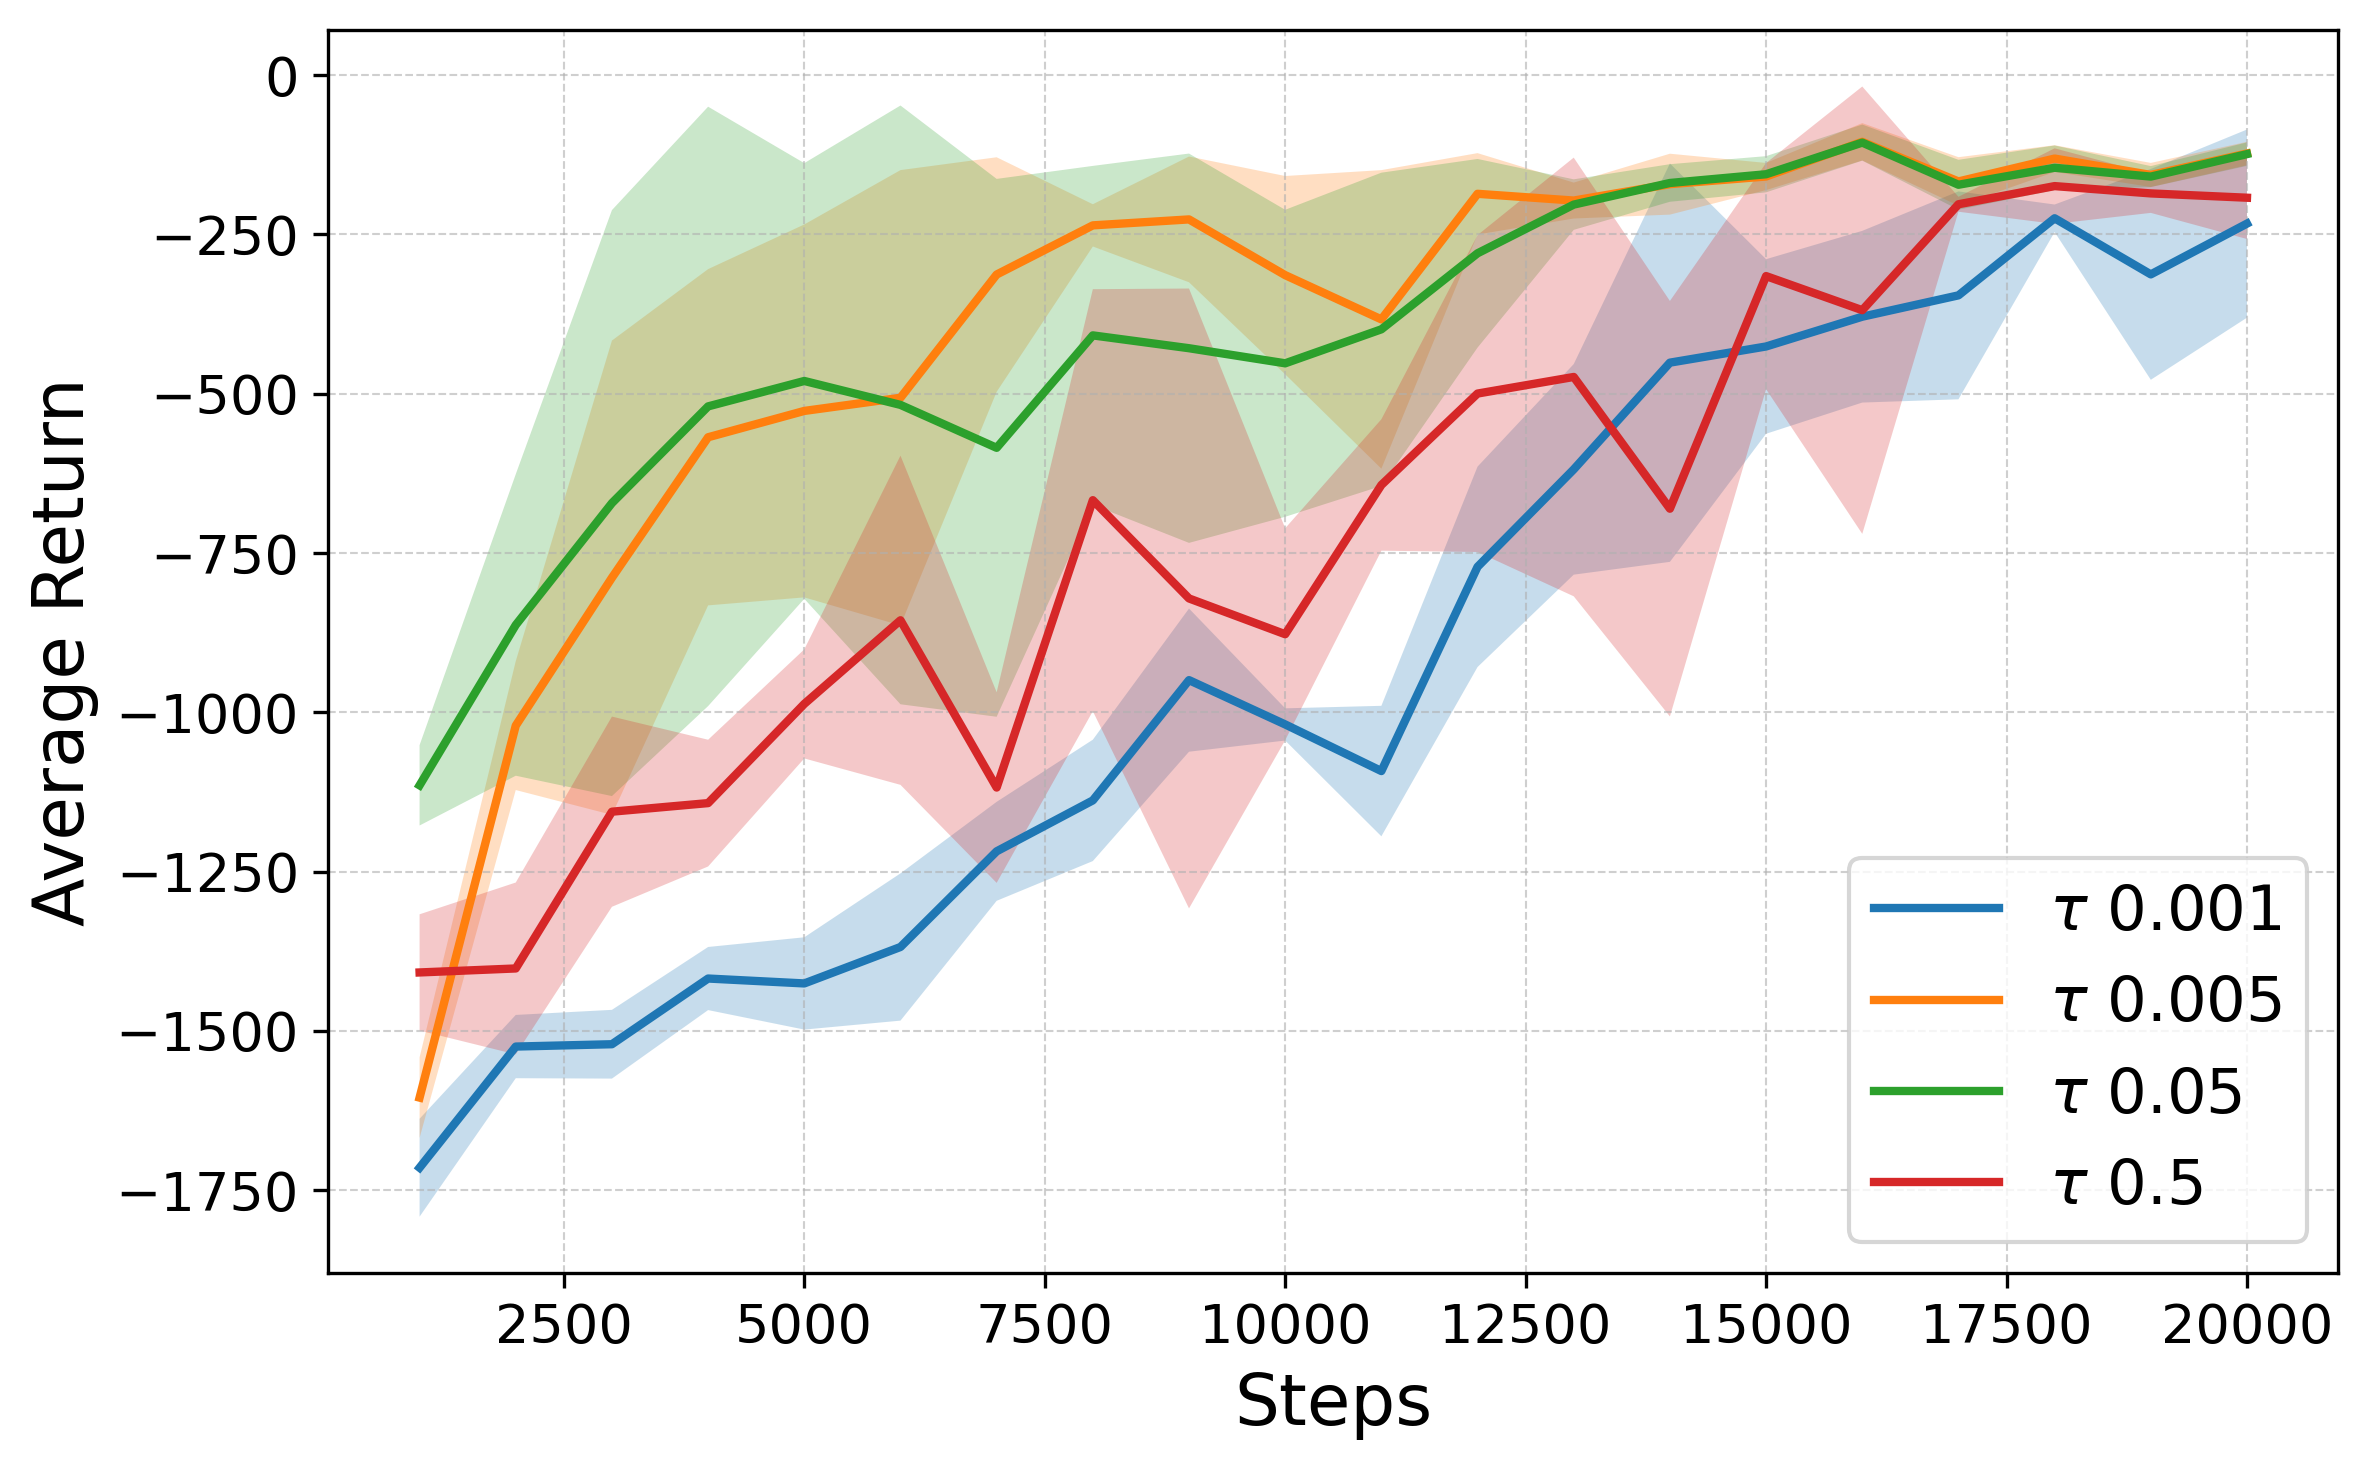

In [5]:
"""
Plot learning curves (mean ± 1 σ over 3 seeds)
==============================================

Expected file naming scheme (adapt to yours!)
    SAC_<env>_use_sde{0|1}_train_freq{1|32}_gradient_step{1|32}_seed<SEED>.npz

Each .npz must contain at least the array  ``eval_returns``  with shape (T, 2)
    eval_returns[:,0]  → global training step
    eval_returns[:,1]  → evaluation return at that step
"""

import glob, json, math, pathlib
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------ #
# 1)  Declare the patterns for every configuration you’d like to draw
# ------------------------------------------------------------------ #
# patterns = {
#     r"$\alpha$ 0.1":   "SAC_MountainCarContinuous-v0_a-0.1_lr-0.0003_tf-32_gd-32_sde-1_s-*.npz",
#     r"$\alpha$ 2.0":   "SAC_MountainCarContinuous-v0_a-2.0_lr-0.0003_tf-32_gd-32_sde-1_s-*.npz",
#     # r"$\alpha$ 0.01":   "SAC_MountainCarContinuous-v0_a-0.01_lr-0.0003_tf-32_gd-32_sde-1_s-*.npz",
#     # "train freq 64":   "SAC_MountainCarContinuous-v0_a-0.1_lr-0.0003_tf-64_gd-64_sde-1_s-*.npz",
# }

# SAC_Pendulum-v1_a-0.1_d-64_tau-0.005_lr-0.001_bs-256_tf-1_gd-1_sde-0_s-0
patterns = {
    r"$\tau$ 0.001":   "SAC_Pendulum-v1_a-0.1_d-256_tau-0.001_lr-0.001_bs-256_tf-1_gd-1_sde-0_s-*.npz",
    r"$\tau$ 0.005":   "SAC_Pendulum-v1_a-0.1_d-256_tau-0.005_lr-0.001_bs-256_tf-1_gd-1_sde-0_s-*.npz",
    r"$\tau$ 0.05":    "SAC_Pendulum-v1_a-0.1_d-256_tau-0.05_lr-0.001_bs-256_tf-1_gd-1_sde-0_s-*.npz",
    r"$\tau$ 0.5":     "SAC_Pendulum-v1_a-0.1_d-256_tau-0.5_lr-0.001_bs-256_tf-1_gd-1_sde-0_s-*.npz",
}



# ------------------------------------------------------------------ #
# 2)  Helper – read one run and turn it into {step: return} dict
# ------------------------------------------------------------------ #
def load_eval_dict(npz_path):
    d      = np.load(npz_path, allow_pickle=True)
    steps  = d["eval_returns"][:, 0].astype(int)
    rets   = d["eval_returns"][:, 1].astype(float)
    return dict(zip(steps, rets))

# ------------------------------------------------------------------ #
# 3)  Aggregate across seeds, interpolate onto a common step grid
# ------------------------------------------------------------------ #
plt.figure(figsize=(8, 5), dpi=300)

for label, pattern in patterns.items():
    files = sorted(glob.glob("./runs/"+pattern))
    if len(files) == 0:
        print(f"⚠️  no files matched “{pattern}” – skipped")
        continue
    print(f"{label:18s}: {len(files)} run(s)")

    # collect dicts and a joint step grid
    runs_dict = [load_eval_dict(f) for f in files]
    all_steps = np.array(sorted(set(chain.from_iterable(d.keys() for d in runs_dict))))

    # interpolate each run onto all_steps
    interp_runs = []
    for d in runs_dict:
        # numpy interpolation needs sorted x; we already have all_steps sorted
        run_steps, run_vals = zip(*sorted(d.items()))
        interp = np.interp(all_steps, run_steps, run_vals)
        interp_runs.append(interp)
    interp_runs = np.vstack(interp_runs)        # shape (n_seeds, n_steps)

    mean = interp_runs.mean(axis=0)
    std  = interp_runs.std(axis=0)

    # ------------------------------------------------------------------ #
    # 4)  Plot mean curve with ±1 σ shaded band
    # ------------------------------------------------------------------ #
    plt.plot(all_steps, mean, label=label, linewidth=2)
    plt.fill_between(all_steps, mean - std, mean + std, alpha=0.25)

# ------------------------------------------------------------------ #
# 5)  Cosmetics
# ------------------------------------------------------------------ #
plt.xlabel("Steps", fontsize=17)
plt.ylabel("Average Return", fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# plt.axhline(y=90, color = "#d62728", linestyle='--', linewidth=1.5, label='Solution Thr.')
# plt.title("Soft Actor-Critic on MountainCarContinuous-v0\nmean ± 1 σ over 3 seeds")
plt.legend(loc="lower right", fontsize=15)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.savefig("figures/p_tau.png")
plt.show()
